# Exploring natural cosmetics data set

In this project we inspect the dataset which was scrapped on 18th, Nov 2019 from Flaconi.de - a very popular website in Germany selling cosmetics from affordable to high-end products.

In recent years natural or organic products becomes trending, cosmetics are also not out of this stream. In this project we will discovery:

* Products and brands appearing most on market.
* Average price of several popular line products for hair, face, and fragrance, care.
* Ratings of those product. Does more expensive means better rating?


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re

* To distinguish the products easier, the origin data includes 4 datasets: fragrance, hair, and make up products. 

* We read 4 datasets, add a column named 'group' which indicates name of product group and merge them to 'cosmetics'.

In [2]:
fragrance=pd.read_csv('natur_dufte_aromen.csv')
fragrance['group']='Fragrance'

hair=pd.read_csv('natur_hair.csv')
hair['group']='Hair'

makeup=pd.read_csv('natur_makeup.csv')
makeup['group']='Make-up'

care=pd.read_csv('natur_care.csv')
care['group']='Care'

cosmetics=pd.concat([fragrance, hair, makeup, care])
cosmetics.describe(include='all')

,brand,product,base_price,category,rating,group
count,4750,4750,4750,4750,2373,4750
unique,135,3805,1634,282,34,4
top,Korres,Bamboo,"133,00 € / 100ml",Gesichtscreme,100%,Care
freq,228,19,62,241,1658,3289


* There are 4750 objects, the number of rating is only half of the objects so this column can only be a reference, we don't have enough information to compare between products, categories, or brands.
* There are 135 brands, in which Korres is the most popular name.
* Cream for face is also the most common product in 282 categories.
* Cosmetic is a very diversed market so we should focus on some popular product lines to ensure its representation.
* We choose 5 categories that appear most in each group.

In [3]:
groups=['Fragrance', 'Hair', 'Make-up', 'Care']
cat=[cosmetics[cosmetics.group==i]['category'].value_counts()[:5].index for i in groups]
cat

[Index(['Duftöl', 'Raumduft', 'Saunaaufguss', 'Eau de Parfum', 'Duftkerze'], dtype='object'),
 Index(['Haarshampoo', 'Conditioner', 'Haarfarbe', 'Haarmaske', 'Farbmaske'], dtype='object'),
 Index(['Nagellack', 'Lippenbalsam', 'Mascara', 'Lippenstift',
        'Lidschattenpinsel'],
       dtype='object'),
 Index(['Gesichtscreme', 'Duschgel', 'Gesichtsserum', 'Gesichtsmaske',
        'Stückseife'],
       dtype='object')]

We select only concerning categories and change their name from German into English.

In [4]:
keys=['Duftöl', 'Raumduft', 'Saunaaufguss', 'Eau de Parfum', 'Duftkerze',
      'Haarshampoo', 'Conditioner', 'Haarfarbe', 'Haarmaske', 'Farbmaske',
      'Nagellack', 'Lippenbalsam', 'Mascara', 'Lippenstift','Lidschattenpinsel',
      'Gesichtscreme', 'Duschgel', 'Gesichtsserum', 'Gesichtsmaske','Stückseife']
values=['Scented oil', 'Room fragrance', 'Sauna infusion', 'Eau de parfum','Scented candle', 
        'Hair shampoo', 'Conditioner', 'Hair color', 'Hair mask', 'Color mask', 
        'Nail polish', 'Lip balm', 'Mascara', 'Lipstick', 'Eye shadow brush',
        'Face cream', 'Shower gel', 'Facial serum', 'Facial mask', 'Bar soap']
name_map=dict(zip(keys, values))

#Select popular categories
top_cosmetic=cosmetics[cosmetics.category.isin(keys)]

#Rename category
top_cosmetic.category=top_cosmetic.category.map(name_map)
top_cosmetic.head()

C:\Users\Dieu Anh\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,brand,product,base_price,category,rating,group
4,Primavera,Zirben Kugel,"15,95 € / 1Stk",Room fragrance,100%,Fragrance
6,Primavera,Gute Laune,"109,00 € / 100ml",Scented oil,100%,Fragrance
7,Primavera,Leichter lernenGeschenkset,"9,90 € / 1Stk",Scented oil,NaN,Fragrance
9,NUXE,ProdigieuxLe Parfum,"83,90 € / 100ml",Eau de parfum,96%,Fragrance
10,Primavera,Zirbelkiefer Bio,"129,00 € / 100ml",Scented oil,NaN,Fragrance


* There are many type of package as we can see in head of dataset: 100ml, 1Stk, we will then separate base price into price in eur and unit.
* The rating column is in string type, we remove "%" symbol and convert to float type.

In [5]:
#Convert rating column
top_cosmetic['rating']=top_cosmetic['rating'].str[:-1].astype(float)

#Separate base_price column
top_cosmetic['unit']=top_cosmetic['base_price'].str.split().str[-1]
top_cosmetic['price_eur']=top_cosmetic['base_price'].str.split().str[0]
top_cosmetic['price_eur']=top_cosmetic['price_eur'].str.replace(',','.').astype('float')

#View different types of unit
top_cosmetic['unit'].value_counts()

C:\Users\Dieu Anh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dieu Anh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Dieu Anh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

100ml    1318
10g       305
1Stk       58
10          1
100         1
Name: unit, dtype: int64

Let's see the strange unit "10" and "100":

In [6]:
top_cosmetic[(top_cosmetic.unit=='100') |(top_cosmetic.unit=='10') ]

,brand,product,base_price,category,rating,group,unit,price_eur
647,Pure White Cosmetics,Purely InvitingSatin Cream Lipstick,"0,00 € / 10",Lipstick,NaN,Make-up,10,0.0
3169,Korres,GuavaDuo,"0,00 € / 100",Shower gel,100.0,Care,100,0.0


Guava Duo product is a set 1+1 so we can exclude it from our dataset.

In [7]:
top_cosmetic=top_cosmetic.drop(index=3169, axis=0)

Price of Purely InvitingSatin Cream Lipstick is 27,95 EUR for 1 piece we can fix its price and unit.
In addition,  we need to change the unit '1Stk' in German to '1 pc' in English.

In [8]:
#Correct price of 'Purely Inviting Satin Cream Lipstick'
top_cosmetic.loc[top_cosmetic.unit=='10','price_eur']=27.95
top_cosmetic.loc[top_cosmetic.unit=='10', 'unit']= '1Stk'

#Replace unit '1Stk' by '1 pc'
top_cosmetic['unit']=top_cosmetic['unit'].replace('1Stk','1 pc')
print(top_cosmetic.unit.value_counts())
top_cosmetic.head()

100ml    1318
10g       305
1 pc       59
Name: unit, dtype: int64


,brand,product,base_price,category,rating,group,unit,price_eur
4,Primavera,Zirben Kugel,"15,95 € / 1Stk",Room fragrance,100.0,Fragrance,1 pc,15.95
6,Primavera,Gute Laune,"109,00 € / 100ml",Scented oil,100.0,Fragrance,100ml,109.00
7,Primavera,Leichter lernenGeschenkset,"9,90 € / 1Stk",Scented oil,NaN,Fragrance,1 pc,9.90
9,NUXE,ProdigieuxLe Parfum,"83,90 € / 100ml",Eau de parfum,96.0,Fragrance,100ml,83.90
10,Primavera,Zirbelkiefer Bio,"129,00 € / 100ml",Scented oil,NaN,Fragrance,100ml,129.00


# Summary by brands

Before coming to each category let's see the 10 most popular brands in our dataset.

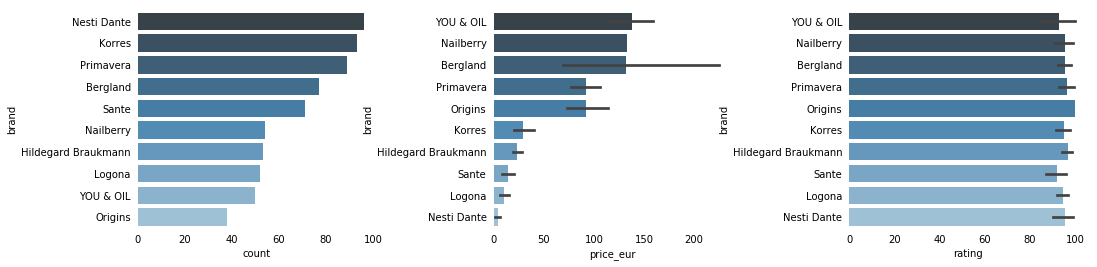

brand
Bergland               Scented oil
Hildegard Braukmann     Face cream
Korres                  Shower gel
Logona                  Hair color
Nailberry              Nail polish
Nesti Dante               Bar soap
Origins                 Face cream
Primavera              Scented oil
Sante                   Shower gel
YOU & OIL              Scented oil
dtype: object

In [128]:
#Subset 10 most popular brands
top10_brand=top_cosmetic.brand.value_counts()[:10].index
brand_top10=top_cosmetic[top_cosmetic.brand.isin(top10_brand)]

#Arrange order of 10 brands according to their mean price
order_top10=brand_top10.groupby('brand')['price_eur'].mean().sort_values(ascending=False).index

f, ax = plt.subplots(figsize=(17,4))
plt.subplots_adjust(wspace=0.5)

#Show price and rating for each brand
for sp in range(0,3):
    plt.subplot(1,3,sp+1)
    if sp==0:
        sns.countplot(y='brand', data=brand_top10, order=top10_brand, palette="Blues_d")
    elif sp==1:
        sns.barplot(y='brand', x='price_eur', data=brand_top10, palette="Blues_d", order=order_top10)
    else:
        sns.barplot(y='brand', x='rating', data=brand_top10, palette="Blues_d", order=order_top10)

    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()


#Find category with highest number of product for each brand
brand_top10.pivot_table(index='brand', columns='category', values='product', aggfunc='count').idxmax(axis=1)

From top 10 brands with most product sold on Flaconi:
* The brand has most product is Nesti Dante, their main product is bar soap.
* Primavera is a fragrance brand at average price.
* YOU&OIL, Nialberry, and Bergland sell expensive fragrance goods.
* Expensive skincare brand is Origins
* Affordable brand are Korres, Hildegard Braukmann, Sante, Logona and Nesti Dande. They provide caring products in general.
* The rating of these popular on average very high, all are above 90%.


# Summary by Category

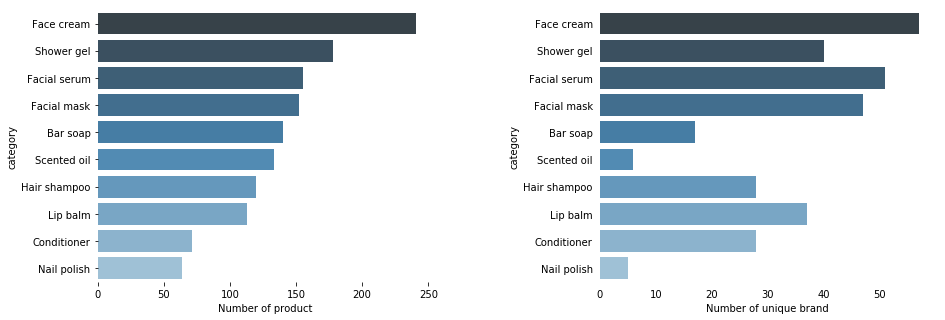

In [126]:
top10_category=top_cosmetic.category.value_counts()[:10].index
category_top10=top_cosmetic[top_cosmetic.category.isin(top10_category)]
f, ax = plt.subplots(figsize=(15,5))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
sns.countplot(y='category', data=category_top10, order=top10_category, palette="Blues_d")
plt.xlabel('Number of product')

plt.subplot(1,2,2)
brand_top10=category_top10.groupby('category')['brand'].describe().reset_index()
sns.barplot(y='category', x='unique', data=brand_top10, order=top10_category, palette="Blues_d")
plt.xlabel('Number of unique brand')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()


* The most popular category is face cream, shower gel, and facial serum.
* Some category although in top 10 category with most products but their brand diversity is limited. For example, there are only 5 or 6 different brands for nail polish and scented oil products, or under 20 unique brands with bar soap while there are more than 50 different brands provide face cream.


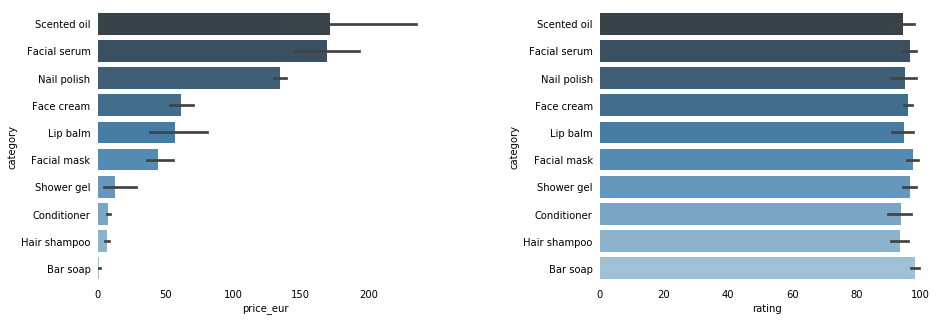

In [123]:
order_top10=category_top10.groupby('category')['price_eur'].mean().sort_values(ascending=False).index
columns=['price_eur','rating']

f, ax = plt.subplots(figsize=(15,5))
plt.subplots_adjust(wspace=0.5)

#Show price and rating for each brand
for sp in range(0,2):
    plt.subplot(1,2,sp+1)
    sns.barplot(y='category', x=columns[sp],data=category_top10, palette="Blues_d", order=order_top10)
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()


In the top 10 popular category we see the different price segments:
* Scented oil, face serum, and nail polish with average price around 150 eur
* Face cream, lip balm, and face mask with price around 50eur
* Shower gel, conditioner, and hair shampoo with average price from 10 to 20 eur
* and bar soap with price around 1-2 eur

The rating for them also high, in which nail polish, conditioner, lip balm, and scented oil have wider range than other product.

# Fragrance Products

Due to the variety of product packages, we should always check whether unit is appropriate for each category

In [12]:
fragrance= top_cosmetic[top_cosmetic.group=='Fragrance']
fragrance.pivot_table(values='product', index='category', columns='unit', aggfunc='count')

unit,1 pc,100ml,10g
category,,,
Eau de parfum,NaN,18.0,NaN
Room fragrance,4.0,43.0,NaN
Sauna infusion,NaN,24.0,NaN
Scented candle,4.0,2.0,11.0
Scented oil,1.0,132.0,NaN


**1. Scented candle**

In [13]:
scented_candle=fragrance[fragrance.category=='Scented candle']
scented_candle[scented_candle.unit.isin(['1 pc', '100ml'])]

,brand,product,base_price,category,rating,group,unit,price_eur
140,RAAW by Trice,Blackened Santal,"17,27 € / 100ml",Scented candle,NaN,Fragrance,100ml,17.27
149,Bomb Cosmetics,Home FragranceVanilla Honey Tin Candle,"9,95 € / 1Stk",Scented candle,NaN,Fragrance,1 pc,9.95
162,RAAW by Trice,Mandarin Moon,"24,81 € / 100ml",Scented candle,NaN,Fragrance,100ml,24.81
165,Bomb Cosmetics,Home FragranceCotton Fresh,"10,95 € / 1Stk",Scented candle,100.0,Fragrance,1 pc,10.95
175,Bomb Cosmetics,Home FragranceLoco Coco,"9,95 € / 1Stk",Scented candle,100.0,Fragrance,1 pc,9.95
188,Bomb Cosmetics,Home FragranceLavender Musk Tin Candle,"9,95 € / 1Stk",Scented candle,NaN,Fragrance,1 pc,9.95


Although the number of product in scented candle is not high, the unit '100ml' and '1 pc' make it difficult to compare price between product. We consider only product in unit of '10g'.

rating       81.750000
price_eur     2.343636
dtype: float64


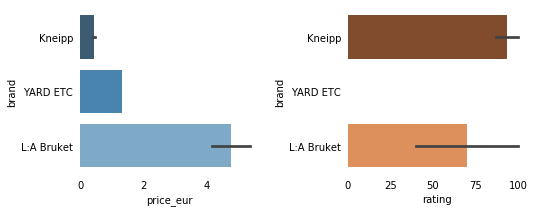

In [14]:
print(scented_candle[scented_candle.unit=='10g'].mean())
scented_candle_name=scented_candle[scented_candle.unit=='10g'].groupby('brand').mean().sort_values(by='price_eur').index

f, ax = plt.subplots(figsize=(8,3))
plt.subplots_adjust(wspace=0.5)

#Show price and rating for each brand
for i in range(0,2):
    plt.subplot(1,2,i+1)
    if i==0:
        sns.barplot(y='brand', x='price_eur',data=scented_candle[scented_candle.unit=='10g'], palette="Blues_d", order=scented_candle_name)
    else:
        sns.barplot(y='brand', x='rating', data=scented_candle[scented_candle.unit=='10g'], palette="Oranges_d", order=scented_candle_name)
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
    
plt.show()

* On average, price of scented candle is 2.3 EUR/10g, the rating is high, above 80%.
* There are only 3 brands here, Kneipp is the most affordable, YARD ETC is at medium price.
* L:A Bruket provide luxury products but the average rating is not proportional to the price, only 70% on average. The rating range is from 40 to 100%.

**2. Perfum**

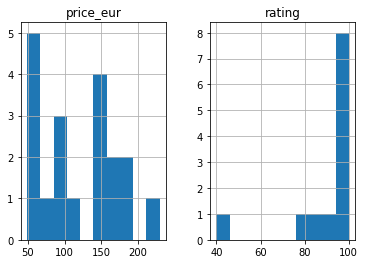

,rating,price_eur
count,12.000000,19.000000
mean,90.916667,118.664737
std,17.578180,55.627794
min,40.000000,48.950000
25%,90.250000,66.450000
50%,100.000000,115.900000
75%,100.000000,156.330000
max,100.000000,229.750000


In [15]:
perfum=top_cosmetic[top_cosmetic['category']=='Eau de parfum']
perfum.hist()
plt.show()
perfum.describe()

We can include all dataset in analyis. Base on quartiles, we can divide into price range to understand dataset better:

C:\Users\Dieu Anh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


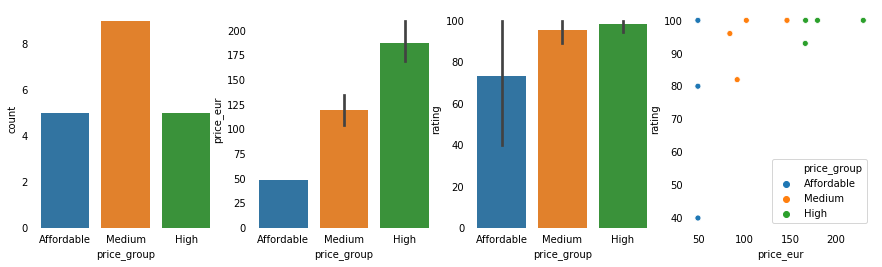

In [16]:
def mapping(price_eur):
    if price_eur <=80:
        return "Affordable"
    elif 80<price_eur<=156.330000:
        return 'Medium'
    else:
        return "High"
perfum['price_group']=perfum['price_eur'].apply(mapping)

perfum_order=['Affordable', 'Medium', 'High']
f, ax = plt.subplots(figsize=(15, 4))
for sp in range(0,4):
    plt.subplot(1,4,sp+1)
    if sp==0:
        sns.countplot(x='price_group', data=perfum, order=perfum_order)
    elif sp==1:
        sns.barplot(x='price_group', y='price_eur', data=perfum, order=perfum_order)
    elif sp==2:
        sns.barplot(x='price_group', y='rating', data=perfum, order=perfum_order)
    else:
        sns.scatterplot(x="price_eur", y="rating", hue="price_group",data=perfum, hue_order=perfum_order)
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)

plt.show()

* Most items are in medium price group.
* Average price of each group are around 50 EUR, 125EUR, and 180EUR for 100ml.
* Rating are above 80% exept for an affordable product. Affordable items' ratings range from 40% to 100%. Let's see what is that.

In [17]:
perfum[perfum.rating<80]

,brand,product,base_price,category,rating,group,unit,price_eur,price_group
151,Nesti Dante,Regina di Peonie,"49,00 € / 100ml",Eau de parfum,40.0,Fragrance,100ml,49.0,Affordable


Let's see brands in different price segments

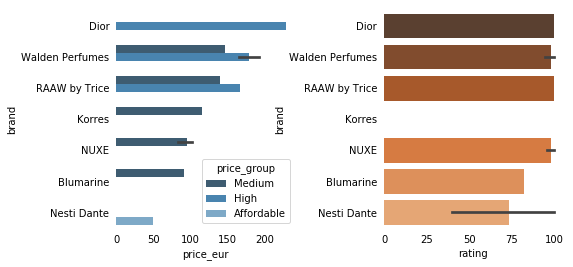

In [18]:
perfum_name=perfum.groupby('brand')['price_eur'].mean().sort_values(ascending=False).index

f, ax = plt.subplots(figsize=(8,4))
plt.subplots_adjust(wspace=0.5)

#Show price and rating for each brand
for i in range(0,2):
    plt.subplot(1,2,i+1)
    if i==0:
        sns.barplot(x='price_eur', y='brand',hue='price_group', data=perfum, order=perfum_name, palette='Blues_d')
    else:
        sns.barplot(y='brand', x='rating', data=perfum, order=perfum_name, palette="Oranges_d")
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
    
plt.show()

* Dior is the most expensive brand.
* Walden Perfumes and RAAW by Trice provides products in both High and Medium price group.
* Blumarine products are in medium price group and they are not rated really high, around 80% in compared to others, all are rated at around 100%.
* Nesti Dante is the only brand provide affordable items. This is where the bad rating come from.


**3. Scented oil**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026F858CD8D0>,
      dtype=object)

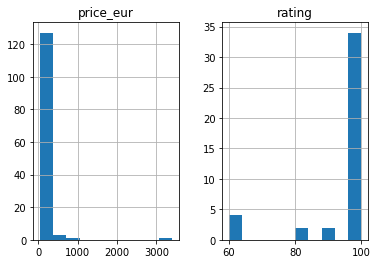

In [19]:
scented_oil=top_cosmetic[(top_cosmetic['category']=='Scented oil')&(top_cosmetic.unit=='100ml') ]
scented_oil.hist()

It seems like we have an outliner here with price over 3000EUR/100ml.

In [20]:
scented_oil[scented_oil.price_eur>3000]

,brand,product,base_price,category,rating,group,unit,price_eur
242,Bergland,AromatologieEchte Rose,"3399,00 € / 100ml",Scented oil,NaN,Fragrance,100ml,3399.0


The highest price is 3399EUR/100ml, or 143.95 eur for 5ml fragrance oil (the real rose oil of Bergland). Although there is the product with the price of 143.95 eur but we can consider it as an outliner so we can exclude it from this set.
In addition, normarly items are in package of 5ml, we change price and unit column to make it more realistic.

In [21]:
scented_oil=scented_oil[scented_oil.price_eur<3000]

scented_oil.price_eur=scented_oil.price_eur/20
scented_oil.unit='5ml'

scented_oil.describe()

,rating,price_eur
count,42.000000,131.000000
mean,94.714286,7.406324
std,12.366922,5.292515
min,60.000000,2.085000
25%,100.000000,4.475000
50%,100.000000,6.450000
75%,100.000000,9.450000
max,100.000000,44.950000


Base on the quartiles of price, we divide product into price group to summarize infomation easier.

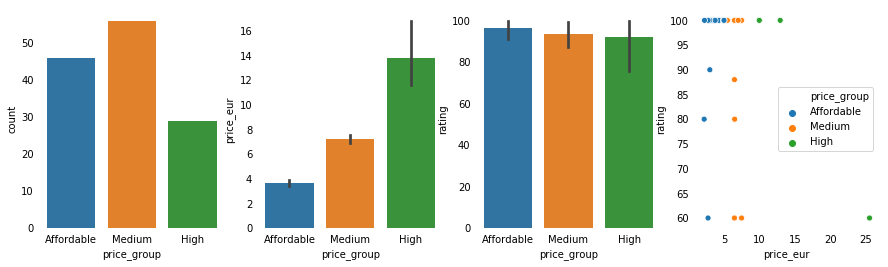

In [22]:
def mapping(price_eur):
    if price_eur <=5:
        return "Affordable"
    elif 5<price_eur<=9.45:
        return 'Medium'
    else:
        return "High"
scented_oil['price_group']=scented_oil['price_eur'].apply(mapping)
price_groups=['Affordable', 'Medium', 'High']
f, ax = plt.subplots(figsize=(15, 4))
for sp in range(0,4):
    plt.subplot(1,4,sp+1)
    if sp==0:
        sns.countplot(x='price_group', data=scented_oil, order=price_groups)
    elif sp==1:
        sns.barplot(x='price_group', y='price_eur', data=scented_oil, order=price_groups)
    elif sp==2:
        sns.barplot(x='price_group', y='rating', data=scented_oil, order=price_groups)

    else:
        sns.scatterplot(x="price_eur", y="rating", hue="price_group",data=scented_oil, hue_order=price_groups)
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)

plt.show()

* Most items are in affordable and medium price groups (prices are under 8EUR/5ml).
* Price of High group is 3 to 4 times higher than the afforddable group.
* Rating does not rise as the price increases. Let's see product with low rating.

In [23]:
scented_oil[scented_oil.rating<80].sort_values(by='price_eur')

,brand,product,base_price,category,rating,group,unit,price_eur,price_group
207,Bergland,AromatologieAbendstimmung,"54,50 € / 100ml",Scented oil,60.0,Fragrance,5ml,2.725,Affordable
98,Primavera,Cosmic Chi,"129,00 € / 100ml",Scented oil,60.0,Fragrance,5ml,6.450,Medium
153,Primavera,Angels,"149,00 € / 100ml",Scented oil,60.0,Fragrance,5ml,7.450,Medium
157,L:A Bruket,Perfume Oil PetitgrainNo. 174,"510,00 € / 100ml",Scented oil,60.0,Fragrance,5ml,25.500,High


They are product from Primavera, L:A Bruket, and Bergland. Let's see the average price and rating for each brand.

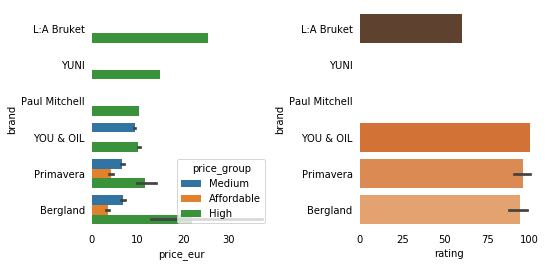

In [24]:
oil_order=scented_oil.groupby('brand')['price_eur'].mean().sort_values(ascending=False).index

f, ax = plt.subplots(figsize=(8,4))
plt.subplots_adjust(wspace=0.5)

#Show price and rating for each brand
for i in range(0,2):
    plt.subplot(1,2,i+1)
    if i==0:
        sns.barplot(x='price_eur', y='brand',hue='price_group', data=scented_oil, order=oil_order)
    else:
        sns.barplot(y='brand', x='rating', data=scented_oil, order=oil_order, palette="Oranges_d")
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
    
plt.show()


* On average, L:A Bruket provides the most expensive product but the average rating is low at about 60%.
* Following are YUNI and Paul Mitchell however they still haven't receved any rating.
* YOU&OIL, Primavera, and Bergland sell items in different price group ang their average rating are quite good, above 80%.

**4. Sauna infusion**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026F84D959E8>,
      dtype=object)

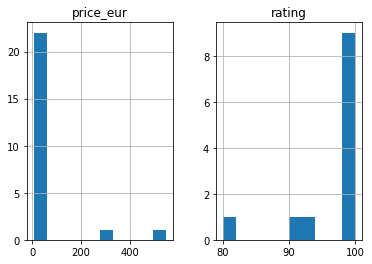

In [25]:
sauna_infusion=top_cosmetic[top_cosmetic.category=='Sauna infusion']
sauna_infusion.hist()

Let's see products at price above 200EUR/100ml

In [26]:
sauna_infusion[sauna_infusion.price_eur>200]

,brand,product,base_price,category,rating,group,unit,price_eur
27,Bergland,WellnessSaunen mit Spaß,"548,75 € / 100ml",Sauna infusion,100.0,Fragrance,100ml,548.75
28,Primavera,Sauna TherapyKennenlernset bio,"330,00 € / 100ml",Sauna infusion,NaN,Fragrance,100ml,330.00


The price are not correctly show on the website. For Bergland, it is 21.95 EUR for 200ml which is 10.975EUR/100ml. For Primavera, it is 9.90EUR/30ml or 33EUR/100ml. They are both set products which includes several items and are at better price for customer. We don't need to include them into our products.

In [27]:
sauna_infusion=sauna_infusion[sauna_infusion.price_eur<200]
sauna_infusion.describe()

,rating,price_eur
count,11.000000,22.000000
mean,96.636364,11.915455
std,6.515715,2.826114
min,80.000000,5.950000
25%,96.500000,10.950000
50%,100.000000,13.500000
75%,100.000000,13.900000
max,100.000000,15.900000


The difference between prices at second and third quartiles are not large, we will group them into 'Medium' group.

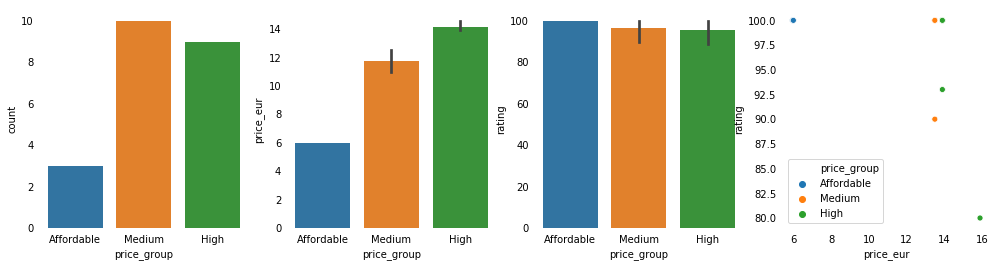

In [28]:
def mapping(price_eur):
    if price_eur <=10.5:
        return "Affordable"
    elif 10.5 <price_eur<=13.5:
        return 'Medium'
    else:
        return "High"

sauna_infusion['price_group']=sauna_infusion['price_eur'].apply(mapping)

price_groups=['Affordable','Medium', 'High']
f, ax = plt.subplots(figsize=(17, 4))
for sp in range(0,4):
    plt.subplot(1,4,sp+1)
    if sp==0:
        sns.countplot(x='price_group', data=sauna_infusion, order=price_groups)
    elif sp==1:
        sns.barplot(x='price_group', y='price_eur', data=sauna_infusion, order=price_groups)
    elif sp==2:
        sns.barplot(x='price_group', y='rating', data=sauna_infusion, order=price_groups)

    else:
        sns.scatterplot(x="price_eur", y="rating", hue="price_group",data=sauna_infusion, hue_order=price_groups)
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)

plt.show()

* There are many product in high price group, nearly equivalent to number of product in medium price group.
* Price of affordable group is only half of medium group.
* Rating are good, all are above 80%.

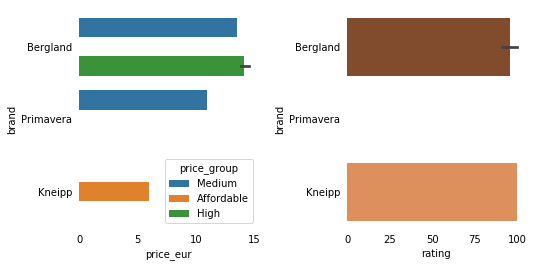

In [29]:
infusion_name=sauna_infusion.groupby('brand')['price_eur'].mean().sort_values(ascending=False).index

f, ax = plt.subplots(figsize=(8,4))
plt.subplots_adjust(wspace=0.5)

#Show price and rating for each brand
for i in range(0,2):
    plt.subplot(1,2,i+1)
    if i==0:
        sns.barplot(x='price_eur', y='brand',hue='price_group', data=sauna_infusion, order=infusion_name)
    else:
        sns.barplot(y='brand', x='rating', data=sauna_infusion, order=infusion_name, palette="Oranges_d")
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
    
plt.show()


* There are only 3 brands sell sauna infusion. 
* Bergland provides both product in medium and high price groups.
* Bergland and Kniepp both received good rating at around 100%

**5. Room fragrance**

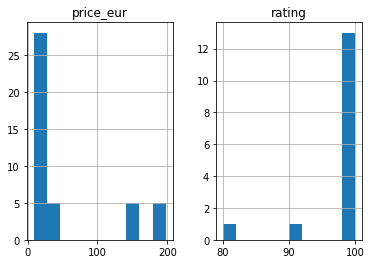

,rating,price_eur
count,15.000000,43.000000
mean,97.866667,56.244651
std,5.578872,67.323669
min,80.000000,8.450000
25%,100.000000,18.170000
50%,100.000000,21.500000
75%,100.000000,34.490000
max,100.000000,198.000000


In [30]:
room_fragrance=fragrance[(fragrance.category=='Room fragrance')&(fragrance.unit=='100ml')]
room_fragrance.hist()
plt.show()
room_fragrance.describe()

Let's see product above 34 EUR

In [31]:
print((room_fragrance.price_eur>34).sum())
room_fragrance[room_fragrance.price_eur>34].sort_values(by='price_eur')

11


,brand,product,base_price,category,rating,group,unit,price_eur
187,Primavera,VanilleBioAirspray,"36,50 € / 100ml",Room fragrance,NaN,Fragrance,100ml,36.50
107,RAAW by Trice,Mandarin Moon,"141,67 € / 100ml",Room fragrance,NaN,Fragrance,100ml,141.67
251,RAAW by Trice,Blackened Santal,"141,67 € / 100ml",Room fragrance,NaN,Fragrance,100ml,141.67
270,RAAW by Trice,Charcoal DiffuserStrandøre,"158,33 € / 100ml",Room fragrance,NaN,Fragrance,100ml,158.33
281,RAAW by Trice,Charcoal DiffuserBlackened Santal,"158,33 € / 100ml",Room fragrance,NaN,Fragrance,100ml,158.33
282,RAAW by Trice,Charcoal DiffuserRoom 64,"158,33 € / 100ml",Room fragrance,NaN,Fragrance,100ml,158.33
202,YOU & OIL,A Scent for HomeEnergy,"198,00 € / 100ml",Room fragrance,NaN,Fragrance,100ml,198.00
211,YOU & OIL,A Scent for HomeJoy,"198,00 € / 100ml",Room fragrance,80.0,Fragrance,100ml,198.00
213,YOU & OIL,A Scent for HomeCalm,"198,00 € / 100ml",Room fragrance,NaN,Fragrance,100ml,198.00
228,YOU & OIL,A Scent for HomeIntimacy,"198,00 € / 100ml",Room fragrance,100.0,Fragrance,100ml,198.00


There are 11 produce above 34 EUR. Let's keep items from 36.5 EUR and below in Medium price group.

C:\Users\Dieu Anh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


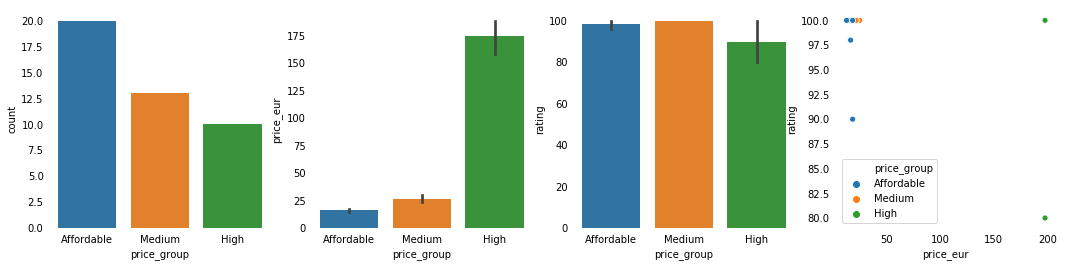

In [32]:
def mapping(price_eur):
    if price_eur <=18.17:
        return "Affordable"
    elif 18.17<price_eur<=36.5:
        return 'Medium'
    else:
        return "High"
room_fragrance['price_group']=room_fragrance['price_eur'].apply(mapping)
price_groups=['Affordable', 'Medium', 'High']
f, ax = plt.subplots(figsize=(18, 4))
for sp in range(0,4):
    plt.subplot(1,4,sp+1)
    if sp==0:
        sns.countplot(x='price_group', data=room_fragrance, order=price_groups)
    elif sp==1:
        sns.barplot(x='price_group', y='price_eur', data=room_fragrance, order=price_groups)
    elif sp==2:
        sns.barplot(x='price_group', y='rating', data=room_fragrance, order=price_groups)

    else:
        sns.scatterplot(x="price_eur", y="rating", hue="price_group",data=room_fragrance, hue_order=price_groups)    
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)

plt.show()

* Most product are under 20EUR/100ml.
* Items in high price group are 6-7 times more expensive than the one in affordable price group.
* Rating are all from 80%.

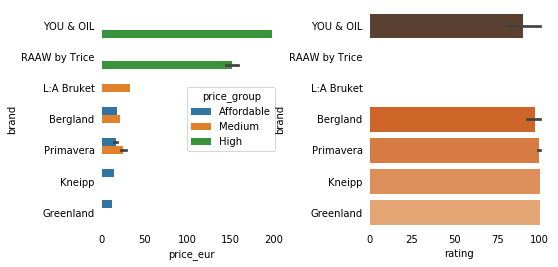

In [33]:
roomfrag_name=room_fragrance.groupby('brand')['price_eur'].mean().sort_values(ascending=False).index

f, ax = plt.subplots(figsize=(8,4))
plt.subplots_adjust(wspace=0.5)

#Show price and rating for each brand
for i in range(0,2):
    plt.subplot(1,2,i+1)
    if i==0:
        sns.barplot(x='price_eur', y='brand',hue='price_group', data=room_fragrance, order=roomfrag_name)
    else:
        sns.barplot(y='brand', x='rating', data=room_fragrance, order=roomfrag_name, palette="Oranges_d")
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
    
plt.show()


* YOU & OIL and RAAW by Trice are expensive brands.
* Bergland and Primavera sell room fragrance at medium and affordable prices.
* Kneipp and Greenland are in affordable price group.

# Hair Products

In [34]:
hair= top_cosmetic[top_cosmetic['group']=='Hair']
hair.pivot_table(values='product', index='category', columns='unit', aggfunc='count')

unit,1 pc,100ml,10g
category,,,
Color mask,NaN,19.0,NaN
Conditioner,1.0,70.0,NaN
Hair color,NaN,34.0,23.0
Hair mask,3.0,18.0,NaN
Hair shampoo,2.0,117.0,1.0


**1. Color mask**

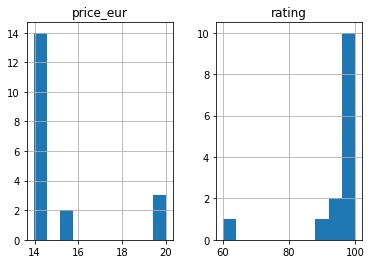

,brand,product,base_price,category,rating,group,unit,price_eur
count,19,19,19,19,14.000000,19,19,19.000000
unique,2,19,3,1,NaN,1,1,NaN
top,Maria Nila,Shade Variation CareGolden Blond,"13,95 € / 100ml",Color mask,NaN,Hair,100ml,NaN
freq,14,1,14,19,NaN,19,19,NaN
mean,NaN,NaN,NaN,NaN,94.357143,NaN,NaN,15.057895
std,NaN,NaN,NaN,NaN,10.441096,NaN,NaN,2.244639
min,NaN,NaN,NaN,NaN,60.000000,NaN,NaN,13.950000
25%,NaN,NaN,NaN,NaN,93.750000,NaN,NaN,13.950000
50%,NaN,NaN,NaN,NaN,98.000000,NaN,NaN,13.950000
75%,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,14.675000


In [35]:
color_mask=hair[hair.category=='Color mask']
color_mask.hist()
plt.show()
color_mask.describe(include='all')

* The most popular brand is Maria Nila.
* There are 14 out of 19 products are already reviewed.
* Base on quartiles of price, we divide products in to affordable and high price group and price at cut off point is 13.95EUR/100ml.

C:\Users\Dieu Anh\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


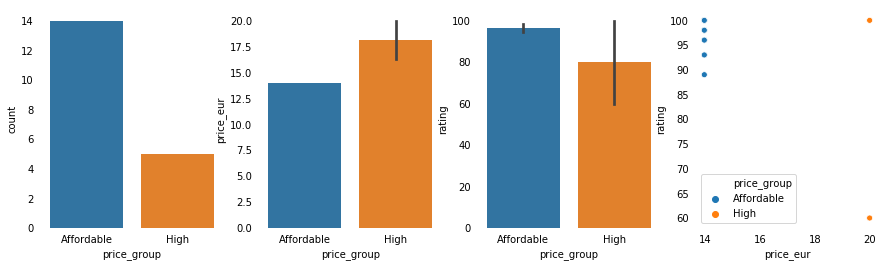

In [36]:
def mapping(price_eur):
    if price_eur <=13.95:
        return "Affordable"
    else:
        return 'High'
    
color_mask['price_group']=color_mask['price_eur'].apply(mapping)
price_groups=['Affordable', 'High']
f, ax = plt.subplots(figsize=(15, 4))
for sp in range(0,4):
    plt.subplot(1,4,sp+1)
    if sp==0:
        sns.countplot(x='price_group', data=color_mask, order=price_groups)
    elif sp==1:
        sns.barplot(x='price_group', y='price_eur', data=color_mask, order=price_groups)
        
    elif sp==2:
        sns.barplot(x='price_group', y='rating', data=color_mask, order=price_groups)

    else:
        sns.scatterplot(x="price_eur", y="rating", hue="price_group",data=color_mask, hue_order=price_groups)    
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()

Most products are in affordable price group. The gap between 2 groups is about 4EUR.

In [37]:
color_mask[color_mask.rating<80]

,brand,product,base_price,category,rating,group,unit,price_eur,price_group
179,Christophe Robin,Shade Variation CareBaby Blonde,"20,00 € / 100ml",Color mask,60.0,Hair,100ml,20.0,High


The item rated at 60% is a product in High price group from Christophe Robin . 


In [38]:
print(color_mask[color_mask['price_group']=='Affordable'].brand.unique())
color_mask[color_mask['price_group']=='High'].brand.unique()

['Maria Nila']


array(['Christophe Robin'], dtype=object)

* There are only 2 brands sell color mask but they are in totally different price group.
* Affordable price group is all products of Maria Nila and products of Christophe Robin are in High price group.
* Rating of Christophe Robin varied from 60 to 100% while rating of Maria Nila is stable around 90%

**2. Conditioner**

We only choose the conditioner sold with price based on 100ml. Number of product in other unit is not considerable to be included.

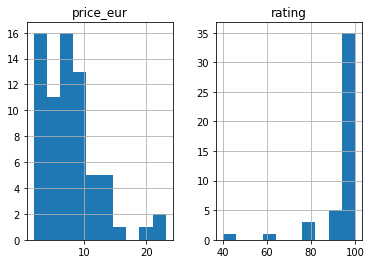

,brand,product,base_price,category,rating,group,unit,price_eur
count,70,70,70,70,45.000000,70,70,70.000000
unique,28,70,41,1,NaN,1,1,NaN
top,Biolage R.A.W.,Coriander Black PepperNo. 087,"9,95 € / 100ml",Conditioner,NaN,Hair,100ml,NaN
freq,6,1,6,70,NaN,70,70,NaN
mean,NaN,NaN,NaN,NaN,94.688889,NaN,NaN,7.808429
std,NaN,NaN,NaN,NaN,11.401400,NaN,NaN,4.557118
min,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,1.860000
25%,NaN,NaN,NaN,NaN,95.000000,NaN,NaN,4.980000
50%,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,7.370000
75%,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,9.950000


In [39]:
conditioner=hair[(hair.category=='Conditioner') &(hair.unit=='100ml')]
conditioner.hist()
plt.show()
conditioner.describe(include='all')

C:\Users\Dieu Anh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


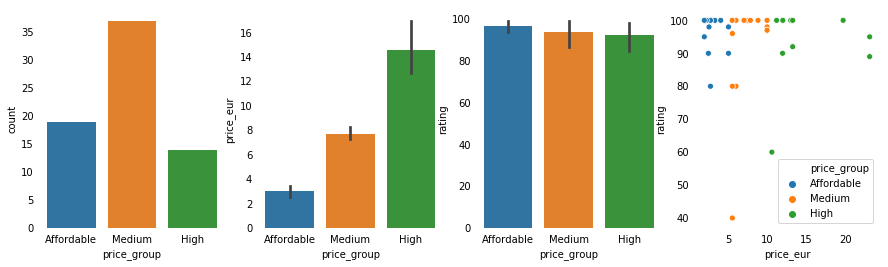

In [40]:
def mapping(price_eur):
    if price_eur <=4.98:
        return "Affordable"
    elif 4.98<price_eur<=9.95:
        return 'Medium'
    else:
        return 'High'
    
conditioner['price_group']=conditioner['price_eur'].apply(mapping)
price_order=['Affordable','Medium', 'High']

f, ax = plt.subplots(figsize=(15, 4))
for sp in range(0,4):
    plt.subplot(1,4,sp+1)
    if sp==0:
        sns.countplot(x='price_group', data=conditioner, order=price_order)
    elif sp==1:
        sns.barplot(x='price_group', y='price_eur', data=conditioner, order=price_order)
    elif sp==2:
        sns.barplot(x='price_group', y='rating', data=conditioner, order=price_order)
        
    else:
        sns.scatterplot(x="price_eur", y="rating", hue="price_group",data=conditioner, hue_order=price_order)    
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()

* Most products are at price about 8EUR/100ml
* Items in High price group can go up to more than 20EUR/100ml which is 5 times higher than items in Affordable price group.
* Affordable items are rated above 80% while Medium and High price items'rating might fall under 80%. Let's see what are they.

In [41]:
conditioner[conditioner.rating<80]

,brand,product,base_price,category,rating,group,unit,price_eur,price_group
105,John Masters Organics,Rosemary & Peppermint,"10,57 € / 100ml",Conditioner,60.0,Hair,100ml,10.57,High
382,Korres,Pure Greek OliveShine,"5,48 € / 100ml",Conditioner,40.0,Hair,100ml,5.48,Medium


There are 28 brands. Let's see which group are they fall in.

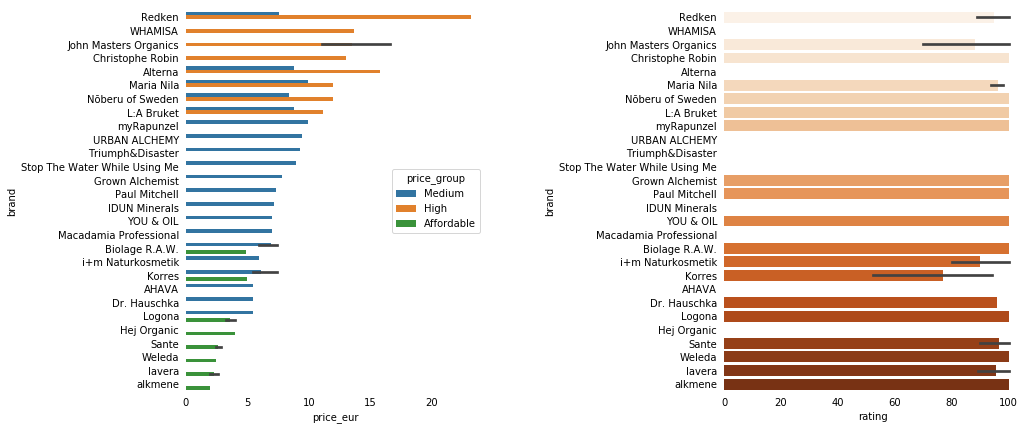

In [42]:
conditioner_name=conditioner.groupby('brand')['price_eur'].mean().sort_values(ascending=False).index

f, ax = plt.subplots(figsize=(15, 7))
plt.subplots_adjust(wspace=0.8)
for sp in range(0,2):
    plt.subplot(1,2,sp+1)
    if sp==0:
        sns.barplot(x='price_eur', y='brand',hue='price_group', data=conditioner, order=conditioner_name)
    else:
        sns.barplot(x='rating', y='brand', data=conditioner, order=conditioner_name, palette="Oranges")    
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()

* Several brands provides products not only in 1 price segment, either affordable and medium group or medium and high group.
* Both Price and Rating of John Masters Organics and Korres varies in the widest range in compare with other brands for conditioner.

**3. Hair mask**

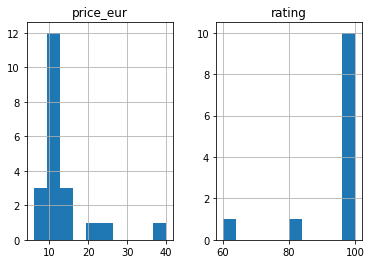

,brand,product,base_price,category,rating,group,unit,price_eur
count,21,21,21,21,12.000000,21,21,21.000000
unique,10,21,15,1,NaN,1,2,NaN
top,Maria Nila,Sauna RepairArgan,"10,38 € / 100ml",Hair mask,NaN,Hair,100ml,NaN
freq,6,1,4,21,NaN,21,18,NaN
mean,NaN,NaN,NaN,NaN,94.666667,NaN,NaN,12.938571
std,NaN,NaN,NaN,NaN,12.338656,NaN,NaN,7.633428
min,NaN,NaN,NaN,NaN,60.000000,NaN,NaN,5.950000
25%,NaN,NaN,NaN,NaN,99.000000,NaN,NaN,9.740000
50%,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,10.380000
75%,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,13.000000


In [43]:
hair_mask=hair[hair.category=='Hair mask']
hair_mask.hist()
plt.show()
hair_mask.describe(include='all')

The difference between second and third quartiles is small, we group them into Medium price group.

C:\Users\Dieu Anh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


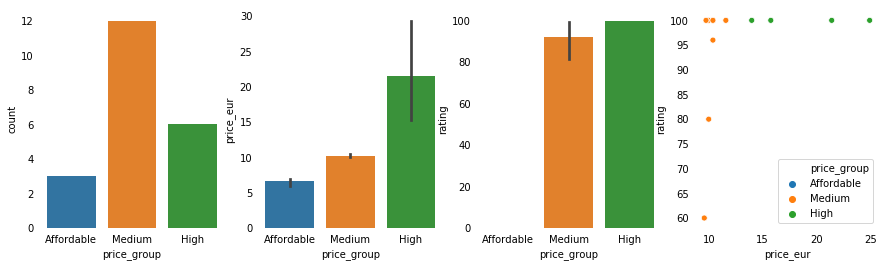

In [44]:
def mapping(price_eur):
    if price_eur <=9.47:
        return "Affordable"
    elif 9.47<price_eur<13:
        return 'Medium'
    else:
        return 'High'
    
hair_mask['price_group']=hair_mask['price_eur'].apply(mapping)
price_order=['Affordable','Medium', 'High']
f, ax = plt.subplots(figsize=(15, 4))
for sp in range(0,4):
    plt.subplot(1,4,sp+1)
    if sp==0:
        sns.countplot(x='price_group', data=hair_mask, order=price_order)
    elif sp==1:
        sns.barplot(x='price_group', y='price_eur', data=hair_mask, order=price_order)
    elif sp==2:
        sns.barplot(x='price_group', y='rating', data=hair_mask, order=price_order)
    else:
        sns.scatterplot(x="price_eur", y="rating", hue="price_group",data=hair_mask, hue_order=price_order)
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()

In [45]:
hair_mask[hair_mask.rating<80]

,brand,product,base_price,category,rating,group,unit,price_eur,price_group
326,AHAVA,Deadsea WaterDeep Nourishing Hair Mask,"9,58 € / 100ml",Hair mask,60.0,Hair,100ml,9.58,Medium


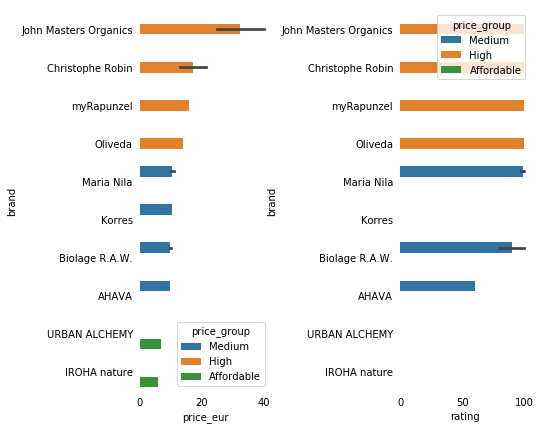

In [46]:
hairmask_name=hair_mask.groupby('brand')['price_eur'].mean().sort_values(ascending=False).index

f, ax = plt.subplots(figsize=(7, 7))
plt.subplots_adjust(wspace=1)
for sp in range(0,2):
    plt.subplot(1,2,sp+1)
    if sp==0:
        sns.barplot(x='price_eur', y='brand',hue='price_group', data=hair_mask, order=hairmask_name)
    else:
        sns.barplot(x='rating', y='brand', data=hair_mask, order=hairmask_name, hue='price_group')    
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()

* Price range of John Masters Organics and Christophe Robin are wide.
* Rating of High group price are all around 100%
* Rating of Biolage R.A.W fluctuate around 90%
* AHAVA is in Medium price group and rating is quite low, under 70%.
* Affordable brands haven't received any rating.

**4. Shampoo**

We take only liquid shampoo in this analysis.

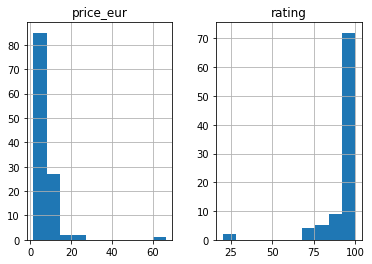

,brand,product,base_price,category,rating,group,unit,price_eur
count,117,117,117,117,92.000000,117,117,117.000000
unique,27,116,51,1,NaN,1,1,NaN
top,Logona,Aloe & Dittany,"1,98 € / 100ml",Hair shampoo,NaN,Hair,100ml,NaN
freq,15,2,15,117,NaN,117,117,NaN
mean,NaN,NaN,NaN,NaN,93.597826,NaN,NaN,6.495299
std,NaN,NaN,NaN,NaN,13.353240,NaN,NaN,7.201076
min,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,1.480000
25%,NaN,NaN,NaN,NaN,93.000000,NaN,NaN,2.000000
50%,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,3.980000
75%,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,8.990000


In [47]:
shampoo=hair[(hair.category=='Hair shampoo') & (hair.unit=='100ml')]
shampoo.hist()
plt.show()
shampoo.describe(include='all')

* Half the number of shampoo are under 3.98EUR/100ml, we let them all in the Affordable price group.
* High price group are product in between 3.98EUR/100ml and 8.99EUR/100ml.
* The rest will be listed in the luxury group.

C:\Users\Dieu Anh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


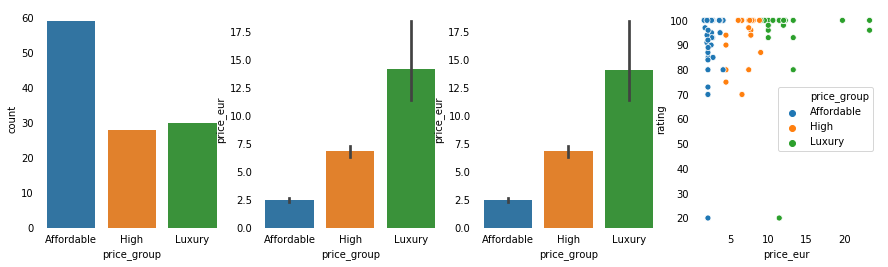

In [48]:
def mapping(price_eur):
    if price_eur <=3.98:
        return "Affordable"
    elif 3.98<price_eur<8.99:
        return 'High'
    else:
        return 'Luxury'
shampoo['price_group']=shampoo['price_eur'].apply(mapping)
price_order=['Affordable', 'High', 'Luxury']
f, ax = plt.subplots(figsize=(15, 4))
for sp in range(0,4):
    plt.subplot(1,4,sp+1)
    if sp==0:
        sns.countplot(x='price_group', data=shampoo, order=price_order)
    elif sp==1:
        sns.barplot(x='price_group', y='price_eur', data=shampoo, order=price_order)
    elif sp==2:
        sns.barplot(x='price_group', y='price_eur', data=shampoo, order=price_order)
    else:
        sns.scatterplot(x="price_eur", y="rating", hue="price_group",data=shampoo, hue_order=price_order)
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()

We can see the gap between group is about 5EUR/100ml. 
There are many rating for shampoo products, varies from afforable to luxury group.

In [49]:
shampoo[shampoo.rating<80].sort_values(by='price_eur', ascending=False)

,brand,product,base_price,category,rating,group,unit,price_eur,price_group
118,Christophe Robin,Delicate VolumizingShampoo with Rose Extracts,"11,40 € / 100ml",Hair shampoo,20.0,Hair,100ml,11.40,Luxury
385,YOU & OIL,Nourish & NurtureHair,"6,48 € / 100ml",Hair shampoo,70.0,Hair,100ml,6.48,High
166,i+m Naturkosmetik,Hair CareBalance Wilde Kräuter,"4,36 € / 100ml",Hair shampoo,75.0,Hair,100ml,4.36,High
222,lavera,Basis sensitivFeuchtigkeit & Pflege,"1,98 € / 100ml",Hair shampoo,73.0,Hair,100ml,1.98,Affordable
260,alkmene,Bio CalendulaReparatur,"1,98 € / 100ml",Hair shampoo,20.0,Hair,100ml,1.98,Affordable
320,Logona,Bio-KamilleFarbreflex,"1,98 € / 100ml",Hair shampoo,70.0,Hair,100ml,1.98,Affordable


Bad rating exists in all price groups.

There are 27 brand for shampoo, let's see their average price and rating.

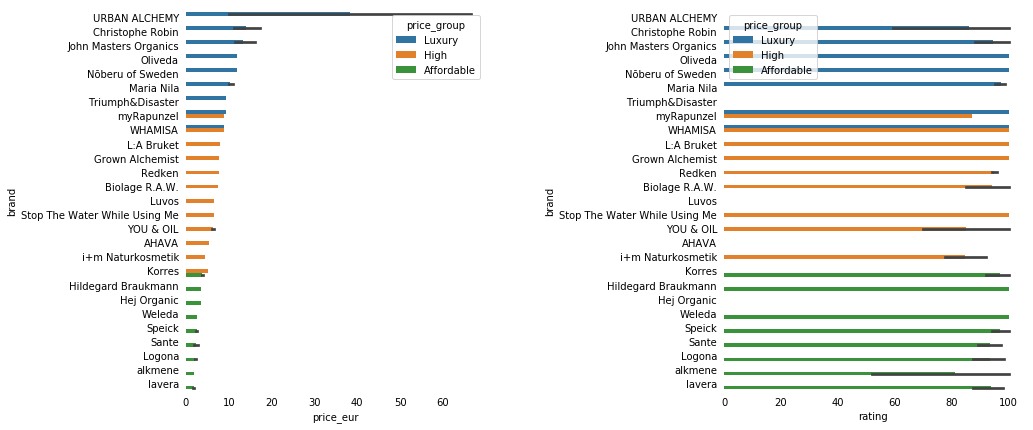

In [50]:
shampoo_name=shampoo.groupby('brand')['price_eur'].mean().sort_values(ascending=False).index

f, ax = plt.subplots(figsize=(15, 7))
plt.subplots_adjust(wspace=0.8)
for sp in range(0,2):
    plt.subplot(1,2,sp+1)
    if sp==0:
        sns.barplot(x='price_eur', y='brand',hue='price_group', data=shampoo, order=shampoo_name)
    else:
        sns.barplot(x='rating', y='brand', hue='price_group', data=shampoo, order=shampoo_name)    
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()

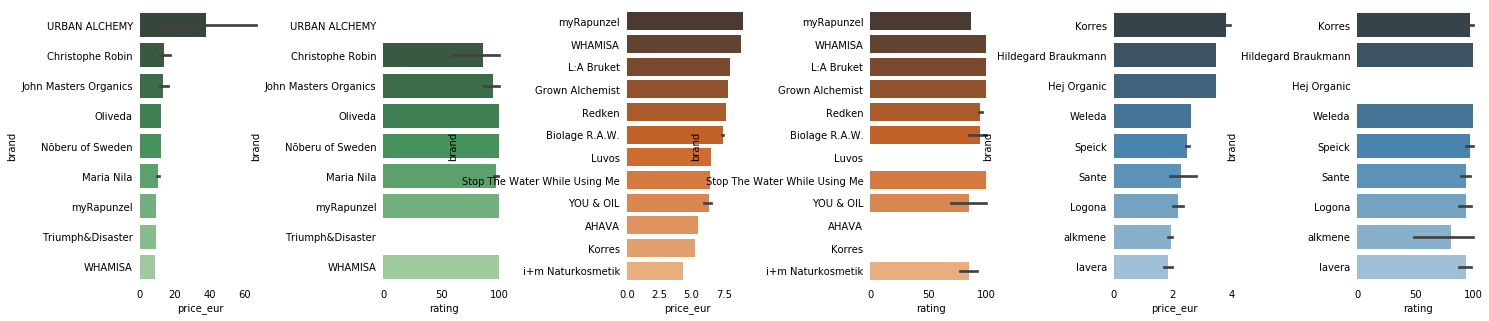

In [51]:
groups=['Luxury','High', 'Affordable']
colors=['Greens_d', 'Oranges_d', 'Blues_d']

f, ax = plt.subplots(figsize=(24,5))
plt.subplots_adjust(wspace=1)

for sp in range(0,3):
    plt.subplot(1,6,(2*sp)+1)
    order_brands=(shampoo[shampoo.price_group==groups[sp]]
                  .groupby('brand')['price_eur']
                  .mean().sort_values(ascending=False).index)
    sns.barplot(x='price_eur', y='brand', data=shampoo[shampoo.price_group==groups[sp]],
                order=order_brands, palette=colors[sp])
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
    plt.subplot(1,6,(2*sp)+2)
    sns.barplot(x='rating', y='brand', data=shampoo[shampoo.price_group==groups[sp]],
                order=order_brands, palette=colors[sp])
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)

plt.show()

* 'URBAN ALCHEMY' is the most expensive brand, but there is no rating for them.
* Product of 'Christophe Robin' can not get totally satisfy from customer.
* Following in the top expensive brand is John Masters Organics.
* 'YOU & OIL' provide items in High price group but the rating is quite not proportional, varies between 60 and 100%
* 'alkmene' might be the most controversial product. Their price is affordable but rating run from 50% to 100%.



**5. Hair color**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026F85DA6CC0>,
      dtype=object)

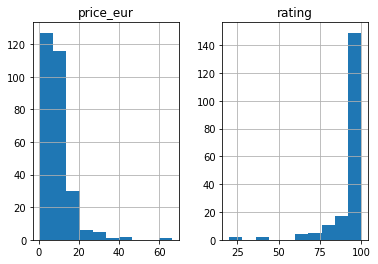

In [52]:
hair_color=hair[hair.category=='Hair color']
hair.hist()

The different between number of hair color product with base price in 10g and 100ml is not big, we inspect both kind of hair color.

In [53]:
print(hair_color[hair_color.unit=='10g'].describe(include='all'))
print(hair_color[hair_color.unit=='100ml'].describe(include='all'))

         brand                    product    base_price    category  \
count       23                         23            23          23   
unique       3                         20             7           1   
top     Logona  Pflanzen PulverFlammenrot  0,50 € / 10g  Hair color   
freq        12                          2             7          23   
mean       NaN                        NaN           NaN         NaN   
std        NaN                        NaN           NaN         NaN   
min        NaN                        NaN           NaN         NaN   
25%        NaN                        NaN           NaN         NaN   
50%        NaN                        NaN           NaN         NaN   
75%        NaN                        NaN           NaN         NaN   
max        NaN                        NaN           NaN         NaN   

            rating group unit  price_eur  
count    14.000000    23   23  23.000000  
unique         NaN     1    1        NaN  
top            NaN

We divide hair color product into powder and liquid types.

**Powder color**

For powder type, the maximum price is quite different from average price. Let's see what are they.

In [54]:
powder_color=hair_color[hair_color.unit=='10g']
liquid_color=hair_color[hair_color.unit=='100ml']

powder_color[powder_color.price_eur>1]

,brand,product,base_price,category,rating,group,unit,price_eur
365,Kevin.Murphy,Color.BugOrange,"46,00 € / 10g",Hair color,NaN,Hair,10g,46.0
377,Kevin.Murphy,Color.BugNeon,"46,00 € / 10g",Hair color,NaN,Hair,10g,46.0


The two outliner products are from Kevin Murphy which are the luxury brand of natural hair care products. Each product is in package of 5g which mean that each piece cost 23 eur. We notice this one. Let's see other powder product. 

As we can see on website of Flaconi they are basically in the package of 100g. We can create new column with price at 100g to have better understanding price of each real product.

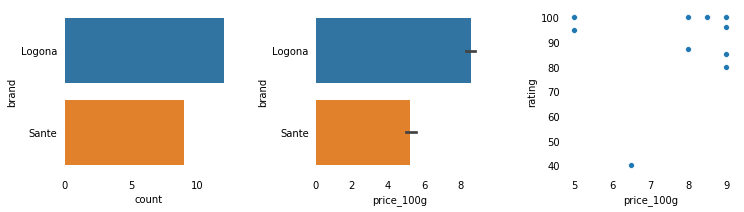

In [55]:
powder_color=powder_color[powder_color.price_eur<1]
powder_color['price_100g']=powder_color['price_eur']*10


f, ax = plt.subplots(figsize=(12, 3))
plt.subplots_adjust(wspace=0.5)
for sp in range(0,3):
    plt.subplot(1,3,sp+1)
    if sp==0:
        sns.countplot(y='brand', data=powder_color)
    elif sp==1:
        sns.barplot(x='price_100g', y='brand', data=powder_color)
    else:
        sns.scatterplot(x="price_100g", y="rating", data=powder_color)
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()

Except for 'Kevin Murphy' there are only 2 brands left. The price difference is about 3 EUR/100g. 
The higher price, the more varied in rating. 
Let's see which product received bad rating.

In [56]:
powder_color[powder_color.rating<80]

,brand,product,base_price,category,rating,group,unit,price_eur,price_100g
376,Sante,Pflanzen PulverSchwarz,"0,65 € / 10g",Hair color,40.0,Hair,10g,0.65,6.5


**Liquid color**

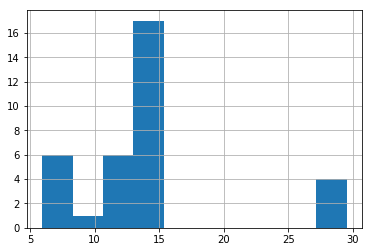

In [57]:
liquid_color['price_eur'].hist()
plt.show()

There are only 4 brands provide liquid corlor product, we don't need to group the by price.

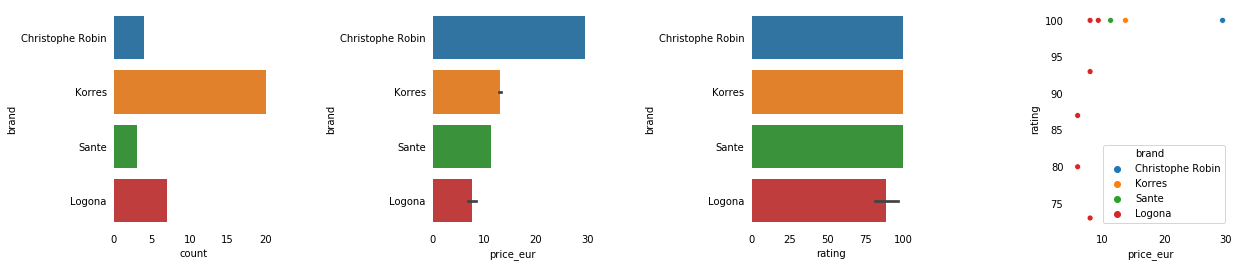

In [58]:
color_name=liquid_color.groupby('brand')['price_eur'].mean().sort_values(ascending=False).index

f, ax = plt.subplots(figsize=(20, 4))
plt.subplots_adjust(wspace=1)

for sp in range(0,4):
    plt.subplot(1,4,sp+1)
    if sp==0:
        sns.countplot(y='brand', data=liquid_color, order=color_name)
    elif sp==1:
        sns.barplot(x='price_eur', y='brand', data=liquid_color, order=color_name)
    elif sp==2:
        sns.barplot(x='rating', y='brand', data=liquid_color, order=color_name)

    else:
        sns.scatterplot(x="price_eur", y="rating",hue='brand', data=liquid_color, hue_order=color_name)
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()

* 'Christophe Robin' is the most expensive brand.
* Price of Korres and Sante are quite comparable
* Logona sell the most affordable products.
* Rating are above 70%. Let's see which falls below 80%.

In [59]:
liquid_color[liquid_color.rating<=80]

,brand,product,base_price,category,rating,group,unit,price_eur
165,Logona,Color CremeMaronenbraun,"7,97 € / 100ml",Hair color,73.0,Hair,100ml,7.97
182,Logona,MineralerdeVorbehandlung,"5,95 € / 100ml",Hair color,80.0,Hair,100ml,5.95


Both products are from Logona brand.

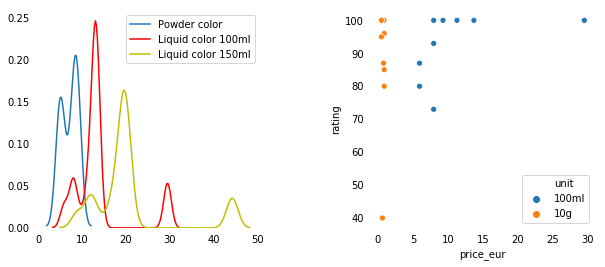

In [60]:
f, ax = plt.subplots(figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

for sp in range(0,2):
    plt.subplot(1,2,sp+1)
    if sp==0:
        #Price of powder hair color for 100g
        sns.kdeplot(powder_color['price_eur']*10)
        #Price of liquid hair color
        sns.kdeplot(liquid_color['price_eur'], color='r')

        #In case product is in the package of 150ml, we can compare price of each product
        sns.kdeplot(liquid_color['price_eur']*150/100, color='y')
        plt.legend(['Powder color', 'Liquid color 100ml', 'Liquid color 150ml'])
    else:
        sns.scatterplot(x="price_eur", y="rating", hue='unit', data=hair_color)
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()

The price of powder hair color is quite lower than liquid products, not regarding the amount we need for each time of hair dying. We are here trying to compare price for each product.

# Make-up Products

In [61]:
makeup= top_cosmetic[top_cosmetic['category'].isin(['Nail polish', 'Lip balm', 'Mascara', 'Lipstick', 'Eye shadow brush'])]
makeup.describe(include='all')

,brand,product,base_price,category,rating,group,unit,price_eur
count,288,288,288,288,133.000000,288,288,288.000000
unique,46,279,159,5,NaN,2,3,NaN
top,Nailberry,Lip Balm,"133,00 € / 100ml",Lip balm,NaN,Make-up,100ml,NaN
freq,54,3,53,113,NaN,214,131,NaN
mean,NaN,NaN,NaN,NaN,92.586466,NaN,NaN,89.067465
std,NaN,NaN,NaN,NaN,14.613779,NaN,NaN,103.261744
min,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,4.090000
25%,NaN,NaN,NaN,NaN,90.000000,NaN,NaN,10.872500
50%,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,48.430000
75%,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,133.000000


Checking appropriation of unit for each category

In [62]:
makeup.pivot_table(values='product', index='category', columns='unit', aggfunc='count')

unit,1 pc,100ml,10g
category,,,
Eye shadow brush,34.0,NaN,NaN
Lip balm,2.0,26.0,85.0
Lipstick,1.0,2.0,34.0
Mascara,NaN,39.0,1.0
Nail polish,NaN,64.0,NaN


**1. Eye shadow brush**

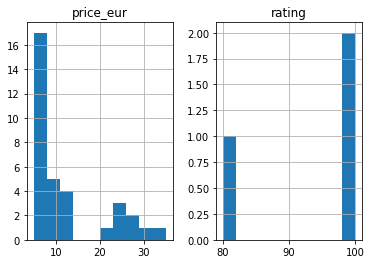

,brand,product,base_price,category,rating,group,unit,price_eur
count,34,34,34,34,3.000000,34,34,34.000000
unique,6,34,16,1,NaN,1,1,NaN
top,Luvia,The EssentialNude - E318,"5,95 € / 1Stk",Eye shadow brush,NaN,Make-up,1 pc,NaN
freq,18,1,8,34,NaN,34,34,NaN
mean,NaN,NaN,NaN,NaN,93.333333,NaN,NaN,12.660294
std,NaN,NaN,NaN,NaN,11.547005,NaN,NaN,8.743420
min,NaN,NaN,NaN,NaN,80.000000,NaN,NaN,4.950000
25%,NaN,NaN,NaN,NaN,90.000000,NaN,NaN,6.075000
50%,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,8.425000
75%,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,13.950000


In [63]:
e_shadow_brush=makeup[makeup.category=='Eye shadow brush']
e_shadow_brush.hist()
plt.show()
e_shadow_brush.describe(include='all')

There are 6 unique brands.
Only 3 products are reviews so we won't count rating in our analysis. 
The difference between minimum value, 1st, and 2nd quartiles are so close, we group them together.

C:\Users\Dieu Anh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


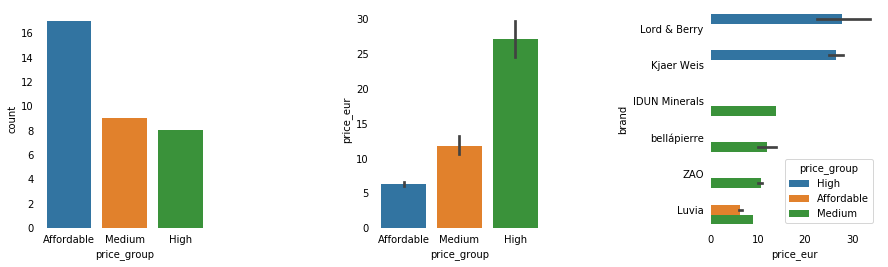

In [64]:
def mapping(price_eur):
    if price_eur <=8.425:
        return "Affordable"
    elif 8.425<price_eur<=13.95:
        return 'Medium'
    else:
        return "High"
e_shadow_brush['price_group']=e_shadow_brush['price_eur'].apply(mapping)

f, ax = plt.subplots(figsize=(15, 4))
plt.subplots_adjust(wspace=1)

for sp in range(0,3):
    plt.subplot(1,3,sp+1)
    if sp==0:
        sns.countplot(x='price_group', data=e_shadow_brush, order=['Affordable', 'Medium', 'High'])
    elif sp==1:
        sns.barplot(x='price_group', y='price_eur', data=e_shadow_brush, order=['Affordable', 'Medium', 'High'])
    else:
        e_brush=e_shadow_brush.groupby('brand').mean().sort_values(by='price_eur',ascending=False).reset_index()
        sns.barplot(x='price_eur', y='brand',hue='price_group', data=e_shadow_brush, order=e_brush['brand'])
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()

* Most products are affordable
* Only Luvia sells affordable items. They also supplies products in Medium price group.
* Lord & Berry and Kjaer Weis are 2 expensive brands with price 4 times higher than affordable items, and twice of Medium products.
* Price of IDUN Minerals and bellapierre are quite comparable

**2. Lip balm**

We choose lip balm sold with '100ml' or '10g' base price unit only. Let's see difference in price of lipbalm having different unit. Suppose the amount of 10ml is equivalent to 10g, whether the prices is similar.

Text(0.5, 0, 'Price in EUR')

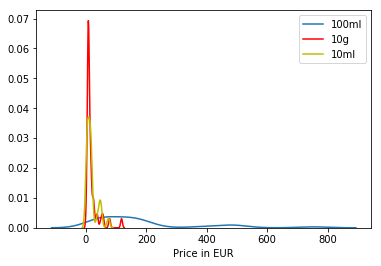

In [65]:
lip=makeup[(makeup.category=='Lip balm')&(makeup.unit!='1 pc')]
#Price of lip balm in 100ml
sns.kdeplot(lip[lip.unit=='100ml']['price_eur'])

#Price of lip balm in 10g
sns.kdeplot(lip[lip.unit=='10g']['price_eur'], color='r')

#Price of lip balm in 10ml
sns.kdeplot(lip[lip.unit=='100ml']['price_eur']/10, color='y')
plt.legend(['100ml', '10g', '10ml'])
plt.xlabel('Price in EUR')

Assuming that 10g of lipbalm is equivalent to 10ml. We calculate a new column for price.

C:\Users\Dieu Anh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Dieu Anh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


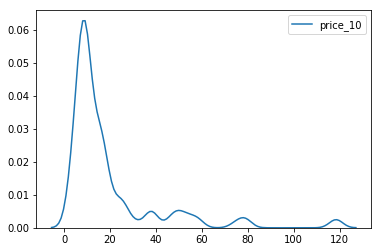

,price_10,rating
count,111.000000,59.000000
mean,19.128991,94.898305
std,21.071811,12.697671
min,3.180000,20.000000
25%,8.500000,96.000000
50%,10.620000,100.000000
75%,17.920000,100.000000
max,118.420000,100.000000


In [66]:
lip1=lip[lip.unit=='100ml']
lip2=lip[lip.unit=='10g']

lip1['price_10']=lip1['price_eur']/10
lip2['price_10']=lip2['price_eur']

lip=pd.concat([lip1, lip2])
sns.kdeplot(lip['price_10'])
plt.show()
lip[['price_10','rating']].describe()

Based on the 3 quartiles of lipbalm price, we divide them into 3 price groups to have better understanding.
The gap between first and second quartile is small so we group all items with price under or equal second quartile into one group.

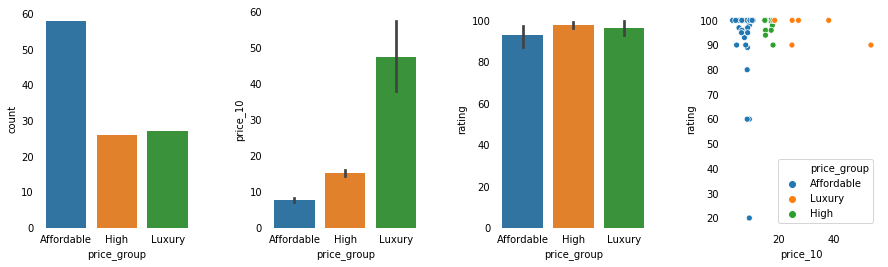

In [67]:
def mapping(price_10):
    if price_10 <=10.62:
        return "Affordable"
    elif 10.62<price_10<=17.92:
        return "High"
    else:
        return "Luxury"
lip['price_group']=lip['price_10'].apply(mapping)

f, ax = plt.subplots(figsize=(15, 4))
plt.subplots_adjust(wspace=0.5)
for sp in range(0,4):
    plt.subplot(1,4,sp+1)
    if sp==0:
        sns.countplot(x='price_group', data=lip, order=['Affordable', 'High', 'Luxury'])
    elif sp==1:
        sns.barplot(x='price_group', y='price_10', data=lip, order=['Affordable', 'High', 'Luxury'])
    elif sp==2:
        sns.barplot(x='price_group', y='rating', data=lip, order=['Affordable', 'High', 'Luxury'])
    else:
        sns.scatterplot(x="price_10", y="rating", hue="price_group",data=lip)
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()

* More than 50% products are affordable with price under 10EUR/10ml
* Price of Luxury group varies a lot between 40-60EUR/10ml
* Most review are over 80%, bad rating appear only in the Affordable group.

In [68]:
lip[lip.rating<80]

,brand,product,base_price,category,rating,group,unit,price_eur,price_10,price_group
1520,Burt's Bees,Lip CareVanilla Bean,"9,29 € / 10g",Lip balm,20.0,Care,10g,9.29,9.29,Affordable
2421,Burt's Bees,Lip CareStrawberry,"9,29 € / 10g",Lip balm,60.0,Care,10g,9.29,9.29,Affordable
2666,YOU & OIL,Nourish & VitaliseLips,"8,50 € / 10g",Lip balm,60.0,Care,10g,8.50,8.50,Affordable


Two out of three products received bad rating is from Burt's Bees, a popular brand of natural cosmetics. The other is from YOU&OIL.

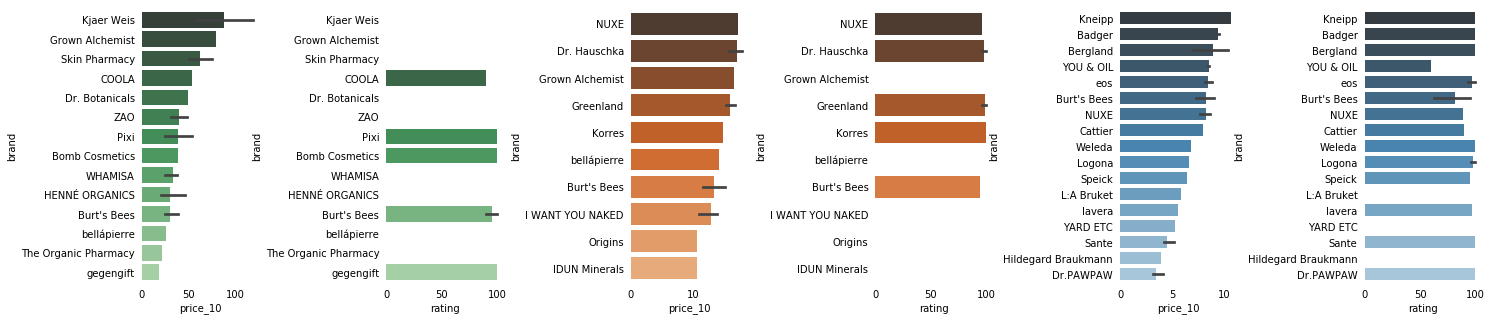

In [69]:
groups=['Luxury','High', 'Affordable']
colors=['Greens_d', 'Oranges_d', 'Blues_d']

f, ax = plt.subplots(figsize=(24,5))
plt.subplots_adjust(wspace=1.1)

for sp in range(0,3):
    plt.subplot(1,6,(2*sp)+1)
    order_brands=(lip[lip.price_group==groups[sp]]
                  .groupby('brand')['price_10']
                  .mean().sort_values(ascending=False).index)
    sns.barplot(x='price_10', y='brand', data=lip[lip.price_group==groups[sp]],
                order=order_brands, palette=colors[sp])
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
    plt.subplot(1,6,(2*sp)+2)
    sns.barplot(x='rating', y='brand', data=lip[lip.price_group==groups[sp]],
                order=order_brands, palette=colors[sp])
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)

plt.show()

* Many products in Luxury and High price groups haven't yet been received reviews. Most rating are for the affordable products. This could be because not many users want to spent much money for a caring lip product.
* YOU & OIL received the worst rating over all. However, one possible reason is that only one customer review for only one product from this brand. You can see it on the set below and also on the website.
* Products of Burt's Bees are popular, their products appear in all price segments but range of rating quite large, from 60 to 100%.
* The most expensive and affortdable brands are Kjaer Weis and Dr.PAWPAW respectively.
* The number of brand in Affordable price group is highest, following is Luxury and High price group.

In [70]:
lip[lip.brand=='YOU & OIL']

,brand,product,base_price,category,rating,group,unit,price_eur,price_10,price_group
2660,YOU & OIL,Nourish & EnergiseLips,"8,50 € / 10g",Lip balm,NaN,Care,10g,8.50,8.50,Affordable
2666,YOU & OIL,Nourish & VitaliseLips,"8,50 € / 10g",Lip balm,60.0,Care,10g,8.50,8.50,Affordable
3059,YOU & OIL,Nourish & NurtureLips,"8,43 € / 10g",Lip balm,NaN,Care,10g,8.43,8.43,Affordable


**3. Lip stick**

We select items with base price for 10g

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026F85891710>,
      dtype=object)

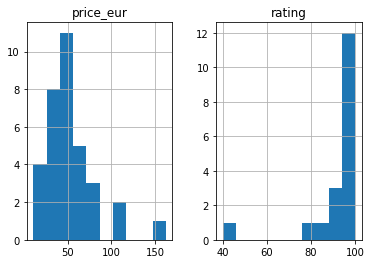

In [71]:
lipstick=makeup[(makeup.category=='Lipstick') & (makeup.unit=='10g')]
lipstick.hist()

Most lipstick are in package of 3-5g. We calculate the price for 5g to get more realistic view about price of product.

In [72]:
lipstick['unit']='5g'
lipstick['price_eur']=lipstick['price_eur']/2
lipstick.describe(include='all')

C:\Users\Dieu Anh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dieu Anh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,brand,product,base_price,category,rating,group,unit,price_eur
count,34,34,34,34,18.000000,34,34,34.000000
unique,13,32,28,1,NaN,1,1,NaN
top,ZAO,Rasperry Twist,"28,43 € / 10g",Lipstick,NaN,Make-up,5g,NaN
freq,6,2,3,34,NaN,34,34,NaN
mean,NaN,NaN,NaN,NaN,92.777778,NaN,NaN,25.842794
std,NaN,NaN,NaN,NaN,14.342678,NaN,NaN,15.150861
min,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,5.320000
25%,NaN,NaN,NaN,NaN,92.250000,NaN,NaN,15.880000
50%,NaN,NaN,NaN,NaN,99.000000,NaN,NaN,23.615000
75%,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,29.937500


* The most popular brand is ZAO
* There are 13 different brands for lipstick.
* Only half of products are reviews
* We divide items into 4 price groups based on 3 quartiles of price.


C:\Users\Dieu Anh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


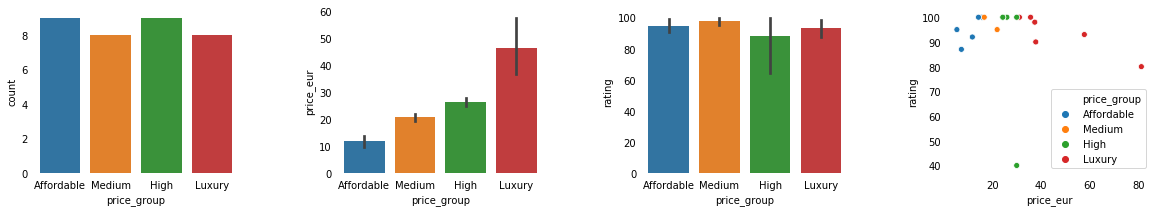

In [73]:
def mapping(price_eur):
    if price_eur <=15.88:
        return "Affordable"
    elif 15.88<price_eur<=23.615:
        return 'Medium'
    elif 23.615<price_eur<=30:
        return "High"
    else:
        return 'Luxury'
lipstick['price_group']=lipstick['price_eur'].apply(mapping)

f, ax = plt.subplots(figsize=(20, 3))
plt.subplots_adjust(wspace=0.5)
price_groups=['Affordable','Medium', 'High', 'Luxury']
for sp in range(0,4):
    plt.subplot(1,4,sp+1)
    if sp==0:
        sns.countplot(x='price_group', data=lipstick, order=price_groups)
    elif sp==1:
        sns.barplot(x='price_group', y='price_eur', data=lipstick, order=price_groups)
    elif sp==2:
        sns.barplot(x='price_group', y='rating', data=lipstick, order=price_groups)
    else:
        sns.scatterplot(x="price_eur", y="rating", hue="price_group",data=lipstick, hue_order=price_groups)
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()

* The number of product in each group are quite equivalent.
* Price in luxury group varied the most from 35 to 50EUR/5g.
* Rating in High price group has largest range. Also the worst rating falls into this group.
* Except for one case with rating 40% in High price group, highest rating places between prices from 15 to 40 EUR/5g. The products at upper price and lower price do not perform well.


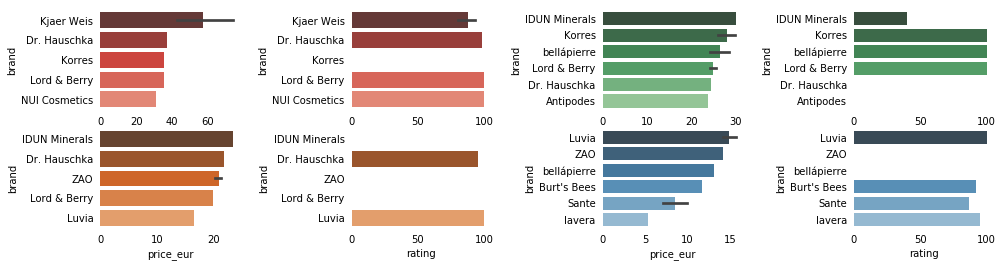

In [74]:
groups=['Luxury', 'High', 'Medium', 'Affordable']
colors=['Reds_d', 'Greens_d', 'Oranges_d', 'Blues_d']

f, ax = plt.subplots(figsize=(16,4))
plt.subplots_adjust(wspace=0.8)
for sp in range(0,4):
    plt.subplot(2,4,(2*sp)+1)
    order_brands=(lipstick[lipstick.price_group==groups[sp]]
                  .groupby('brand')['price_eur']
                  .mean().sort_values(ascending=False).index)
    sns.barplot(x='price_eur', y='brand', data=lipstick[lipstick.price_group==groups[sp]],
                order=order_brands, palette=colors[sp])
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
    plt.subplot(2,4,(2*sp)+2)
    sns.barplot(x='rating', y='brand', data=lipstick[lipstick.price_group==groups[sp]],
                order=order_brands, palette=colors[sp])
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()

* The most expensive brand with widest range of price is 'Kjaer Weis'. The most affordable brand is 'lavera'
* IDUN Minerals is the most expensive brand in the High price group but their rating is not really proportional, on average below 50%. This brand is also included in the Medium price group.
* 'ZAO' and 'Luvia' provides items in price range between Affordable and Medium price groups.
* 'Dr.Hauschka' and 'Lord & Berry' appear in 3 price groups from Medium price group and above.

**4. Mascara**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026F84DA69B0>,
      dtype=object)

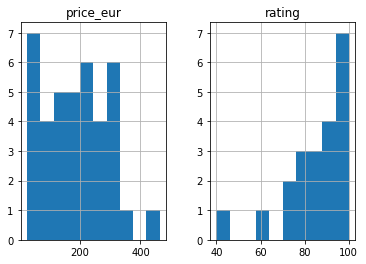

In [75]:
mascara=makeup[(makeup.category=='Mascara') & (makeup.unit=='100ml')]
mascara.hist()

Most products are in package of 10ml, we calculate the price column again.

In [76]:
mascara.price_eur=mascara.price_eur/10
mascara.unit='10ml'
mascara.describe(include='all')

C:\Users\Dieu Anh\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,brand,product,base_price,category,rating,group,unit,price_eur
count,39,39,39,39,21.000000,39,39,39.000000
unique,11,39,35,1,NaN,2,1,NaN
top,IDUN Minerals,Trend sensitivIntense Volumizing,"174,38 € / 100ml",Mascara,NaN,Make-up,10ml,NaN
freq,8,1,2,39,NaN,38,39,NaN
mean,NaN,NaN,NaN,NaN,85.428571,NaN,NaN,19.148667
std,NaN,NaN,NaN,NaN,15.226856,NaN,NaN,10.720993
min,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,2.619000
25%,NaN,NaN,NaN,NaN,80.000000,NaN,NaN,9.923500
50%,NaN,NaN,NaN,NaN,88.000000,NaN,NaN,18.423000
75%,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,25.580500


* There are 11 unique brands. The most popular is IDUN Minerals. Two third of products are reviewed.
* We divide into price group as below:

C:\Users\Dieu Anh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


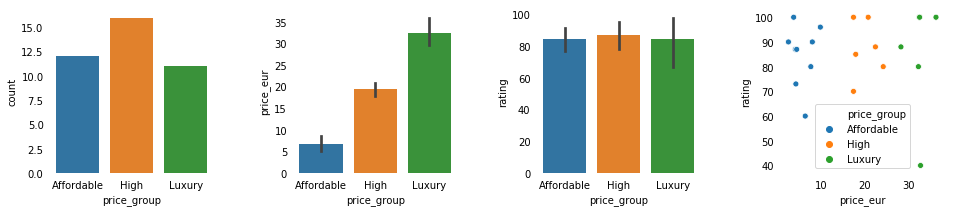

In [77]:
def mapping(price_eur):
    if price_eur <=14:
        return "Affordable"
    elif 14<price_eur<=25.142750:
        return 'High'
    else:
        return 'Luxury'
mascara['price_group']=mascara['price_eur'].apply(mapping)
price_groups=['Affordable', 'High', 'Luxury']
f, ax = plt.subplots(figsize=(16, 3))
plt.subplots_adjust(wspace=0.5)
for sp in range(0,4):
    plt.subplot(1,4,sp+1)
    if sp==0:
        sns.countplot(x='price_group', data=mascara, order=price_groups)
    elif sp==1:
        sns.barplot(x='price_group', y='price_eur', data=mascara, order=price_groups)
    elif sp==2:
        sns.barplot(x='price_group', y='rating', data=mascara, order=price_groups)
    else:
        sns.scatterplot(x="price_eur", y="rating", hue="price_group",data=mascara, hue_order=price_groups)
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()

* Most products are in High price group with average price about 20EUR/10ml.
* The difference between price groups is around 15EUR/10ml.
* Rating for each group varies around 80% and the most varied group is Luxury
* All group received both good and bad rating. Let's see which products are they.


In [78]:
mascara[mascara.rating<80].sort_values(by='price_eur')

,brand,product,base_price,category,rating,group,unit,price_eur,price_group
198,Sante,Mademoiselle Sensitive,"43,13 € / 100ml",Mascara,73.0,Make-up,10ml,4.313,Affordable
308,Sante,Big Catwalk Lashes,"64,50 € / 100ml",Mascara,60.0,Make-up,10ml,6.450,Affordable
132,Korres,Black Volcanic Minerals3D Volume,"174,38 € / 100ml",Mascara,70.0,Make-up,10ml,17.438,High
99,ZAO,BambooVolume & Sheathing,"327,14 € / 100ml",Mascara,40.0,Make-up,10ml,32.714,Luxury


Let's see now the average price and rating for each brand.

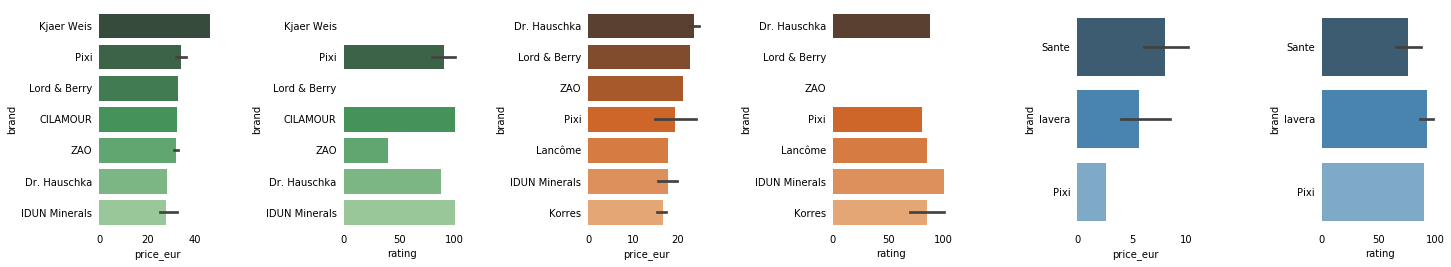

In [79]:
groups=['Luxury', 'High', 'Affordable']
colors=['Greens_d', 'Oranges_d', 'Blues_d']
    
f, ax = plt.subplots(figsize=(24,4))
plt.subplots_adjust(wspace=1.1)

for sp in range(0,3):
    plt.subplot(1,6,(2*sp)+1)
    order_brands=(mascara[mascara.price_group==groups[sp]]
                  .groupby('brand')['price_eur']
                  .mean().sort_values(ascending=False).index)
    sns.barplot(x='price_eur', y='brand', data=mascara[mascara.price_group==groups[sp]],
                order=order_brands, palette=colors[sp])
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
    plt.subplot(1,6,(2*sp)+2)
    sns.barplot(x='rating', y='brand', data=mascara[mascara.price_group==groups[sp]],
                order=order_brands, palette=colors[sp])
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)

plt.show()

* Kjaer Weis is the most expensive brand
* Affordable group includes Sante, lavera, and Pixi. Rating for this group is quite good, all above 70%.
* Pixi have products in all price groups
* ZAO, Lord & Berry, Dr. Hausechka, and IDUN Minerals sell product at high price and above
* In the Luxury group, 'ZAO' did not receive good rating. It falls under 50%.


**5. Nail polish**

C:\Users\Dieu Anh\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


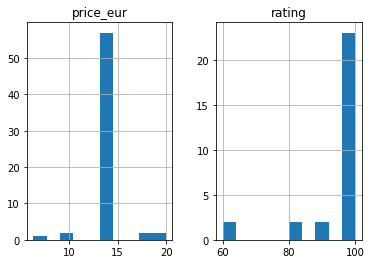

,brand,product,base_price,category,rating,group,unit,price_eur
count,64,64,64,64,29.000000,64,64,64.000000
unique,5,64,9,1,NaN,2,1,NaN
top,Nailberry,L’OxygénéMystique Red,"133,00 € / 100ml",Nail polish,NaN,Make-up,10ml,NaN
freq,54,1,53,64,NaN,63,64,NaN
mean,NaN,NaN,NaN,NaN,95.172414,NaN,NaN,13.461437
std,NaN,NaN,NaN,NaN,11.218827,NaN,NaN,1.791710
min,NaN,NaN,NaN,NaN,60.000000,NaN,NaN,6.318000
25%,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,13.300000
50%,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,13.300000
75%,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,13.300000


In [80]:
nail_polish=makeup[(makeup.category=='Nail polish') & (makeup.unit=='100ml')]
nail_polish.price_eur=nail_polish.price_eur/10
nail_polish.unit='10ml'
nail_polish.hist()
plt.show()

nail_polish.describe(include='all')

There are only 5 brands for nail polish. Only half number of products are reviewed.
The price 13.3EUR/10ml appear most frequently.

C:\Users\Dieu Anh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


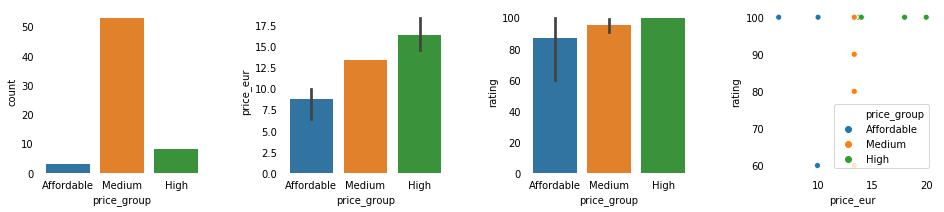

In [81]:
def mapping(price_eur):
    if price_eur <13.3:
        return "Affordable"
    elif price_eur==13.3:
        return "Medium"
    else:
        return "High"
nail_polish['price_group']=nail_polish['price_eur'].apply(mapping)
price_groups=['Affordable', 'Medium', 'High']
f, ax = plt.subplots(figsize=(16, 3))
plt.subplots_adjust(wspace=0.5)
for sp in range(0,4):
    plt.subplot(1,4,sp+1)
    if sp==0:
        sns.countplot(x='price_group', data=nail_polish, order=price_groups)
    elif sp==1:
        sns.barplot(x='price_group', y='price_eur', data=nail_polish, order=price_groups)
    elif sp==2:
        sns.barplot(x='price_group', y='rating', data=nail_polish, order=price_groups)
    else:
        sns.scatterplot(x="price_eur", y="rating", hue="price_group",data=nail_polish, hue_order=price_groups)
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()

* 50% products are at price of 13.3EUR/10ml
* Rating for Affordable group varies the most between 3 groups. This group received the worst rating.

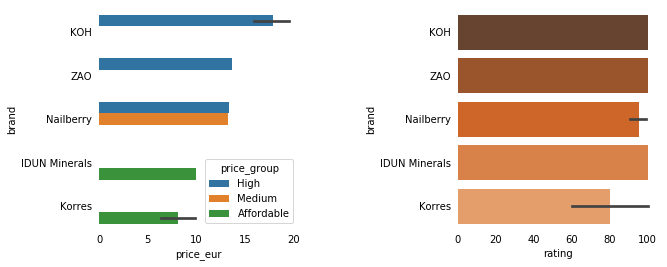

In [82]:
order_name=nail_polish.groupby('brand')['price_eur'].mean().sort_values(ascending=False).index

f, ax = plt.subplots(figsize=(10, 4))
plt.subplots_adjust(wspace=0.8)
for sp in range(0,2):
    plt.subplot(1,2,sp+1)
    if sp==0:
        sns.barplot(x='price_eur', y='brand', hue='price_group', data=nail_polish, order=order_name)
    else:
        sns.barplot(x='rating', y='brand', data=nail_polish, order=order_name, palette="Oranges_d")  
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()

* Most product are from Nailberry. This brands have both items in Medium and High price group.
* Korrest is the most affordable brand and also their rating is the reason why average review of affordale group falls down. 
* KOH and ZAO are the two most expensive brands and their ratings are both high.

# Personal and Skin care Products

In [83]:
care= top_cosmetic[top_cosmetic['category'].isin(['Face cream', 'Shower gel', 'Facial serum', 'Facial mask', 'Bar soap'])]
care.describe(include='all')

,brand,product,base_price,category,rating,group,unit,price_eur
count,866,866,866,866,448.000000,866,866,866.000000
unique,79,797,376,5,NaN,1,3,NaN
top,Nesti Dante,Precious SkincareDiamonds,"0,20 € / 10g",Face cream,NaN,Care,100ml,NaN
freq,91,4,38,241,NaN,866,709,NaN
mean,NaN,NaN,NaN,NaN,96.968750,NaN,NaN,57.954273
std,NaN,NaN,NaN,NaN,8.225508,NaN,NaN,110.783855
min,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,0.130000
25%,NaN,NaN,NaN,NaN,98.750000,NaN,NaN,3.302500
50%,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,25.900000
75%,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,69.287500


* The most popular brand of care group is 'Nesti Dante'
* Face cream is the most popular category

In [84]:
care.pivot_table(values='product', index='category', columns='unit', aggfunc='count')

unit,1 pc,100ml,10g
category,,,
Bar soap,2.0,5.0,133.0
Face cream,1.0,236.0,4.0
Facial mask,1.0,138.0,13.0
Facial serum,2.0,153.0,NaN
Shower gel,1.0,177.0,NaN


We consider bar soap with price per 10g and others with price per 100ml.

**1. Bar soap**

In [85]:
bar_soap=care[care.category=='Bar soap']
bar_soap[bar_soap.unit!='10g']

,brand,product,base_price,category,rating,group,unit,price_eur
1050,Nesti Dante,FiorentiniSoap Collection,"2,83 € / 1Stk",Bar soap,NaN,Care,1 pc,2.83
1648,Hildegard Braukmann,Body Care7 Kräuter,"2,93 € / 100ml",Bar soap,NaN,Care,100ml,2.93
1739,Christophe Robin,HydratingShampoo Bar With Aloe Vera,"16,50 € / 100ml",Bar soap,NaN,Care,100ml,16.50
2455,Greenland,Fruit EmotionsPapaya-Lemon,"8,45 € / 100ml",Bar soap,100.0,Care,100ml,8.45
2565,I WANT YOU NAKED,Soap me,"3,98 € / 1Stk",Bar soap,NaN,Care,1 pc,3.98
2650,Greenland,Fruit EmotionsLime-Vanilla,"8,45 € / 100ml",Bar soap,100.0,Care,100ml,8.45
3001,Greenland,Fruit EmotionsCoconut-Tangerine,"8,45 € / 100ml",Bar soap,100.0,Care,100ml,8.45


Some soap are in price per piece or per 100ml than 10g.  We notice them but not include in dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026F85CD4358>,
      dtype=object)

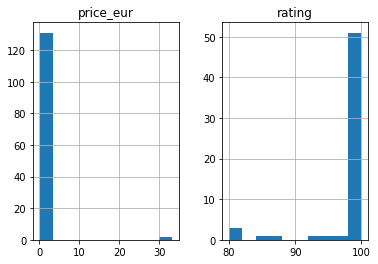

In [86]:
bar_soap=bar_soap[bar_soap.unit=='10g']
bar_soap.hist()

Let's see the soap with price above 30eur/10g whether something wrong here.

In [87]:
bar_soap[bar_soap.price_eur>30]

,brand,product,base_price,category,rating,group,unit,price_eur
626,Nesti Dante,Emozione in ToscanaSoap Collection,"33,25 € / 10g",Bar soap,NaN,Care,10g,33.25
915,Nesti Dante,Dolce VivereSoap Collection,"33,25 € / 10g",Bar soap,NaN,Care,10g,33.25


The actual price is 19.95 eur for 6 pieces of 150g soap. The base price is also not correct. We can exclude them from dataset.

In addition, weight of each product is 100g or 150g. Assumming that each package is 100g, we calculate price column again to have closer view about price of each product.

           rating   price_eur
count   59.000000  131.000000
mean    98.254237    3.429008
std      5.080705    3.105392
min     80.000000    1.300000
25%    100.000000    2.000000
50%    100.000000    2.200000
75%    100.000000    2.800000
max    100.000000   18.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026F85B506A0>,
      dtype=object)

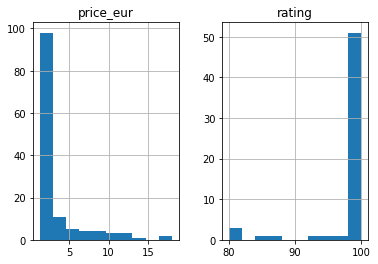

In [88]:
bar_soap=bar_soap[bar_soap.price_eur<30]
bar_soap['price_eur']=bar_soap['price_eur']*10
bar_soap.unit='100g'
print(bar_soap.describe())
bar_soap.hist()

On average price of soap is around 3.4 eur for 100g, rating is also high, all are above 80%.
If 100ml is equivalent to 100g, product of Greenland and Christophe Robin we see above seem to be much more expensive.

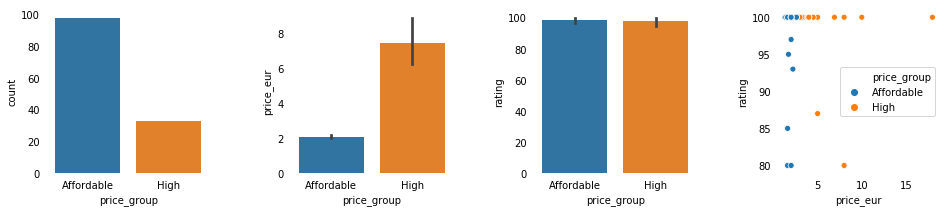

In [89]:
def mapping(price_eur):
    if price_eur <=2.8:
        return "Affordable"
    else:
        return "High"
bar_soap['price_group']=bar_soap['price_eur'].apply(mapping)

price_groups=['Affordable', 'High']

f, ax = plt.subplots(figsize=(16, 3))
plt.subplots_adjust(wspace=0.5)
for sp in range(0,4):
    plt.subplot(1,4,sp+1)
    if sp==0:
        sns.countplot(x='price_group', data=bar_soap, order=price_groups)
    elif sp==1:
        sns.barplot(x='price_group', y='price_eur', data=bar_soap, order=price_groups)
    elif sp==2:
        sns.barplot(x='price_group', y='rating', data=bar_soap, order=price_groups)
    else:
        sns.scatterplot(x="price_eur", y="rating", hue="price_group",data=bar_soap, hue_order=price_groups)
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()

* Most of product are at affordable prices (below 3 EUR/100g).
* High price are about 3 times price of affordable prices.
* Rating for soap are high, all are above 80%.

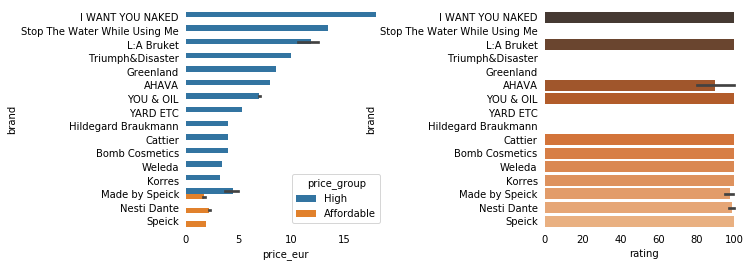

In [90]:
bar_soap_brand=bar_soap.groupby('brand')['price_eur'].mean().sort_values(ascending=False).index

f, ax = plt.subplots(figsize=(10, 4))
plt.subplots_adjust(wspace=0.8)
for sp in range(0,2):
    plt.subplot(1,2,sp+1)
    if sp==0:
        sns.barplot(x='price_eur', y='brand', hue='price_group', data=bar_soap, order=bar_soap_brand)
    else:
        sns.barplot(x='rating', y='brand', data=bar_soap, order=bar_soap_brand, palette="Oranges_d")  
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()

* The most expensive brand is 'I WANT YOU NAKED' and the lowest price is from 'Speick'. They both received good review.
* Most brands produce soap at high price segment.
* Rating of AHAVA has the widest range.

**2. Shower gel**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026F84DF86A0>,
      dtype=object)

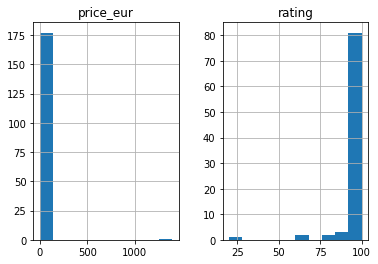

In [91]:
shower_gel=care[care.category=='Shower gel']
shower_gel.hist()

Let's view the outliner

In [92]:
shower_gel[shower_gel.price_eur>1000]

,brand,product,base_price,category,rating,group,unit,price_eur
2889,SA.AL&CO,011 Hair & Body WashTravel Size,"1397,50 € / 100ml",Shower gel,NaN,Care,100ml,1397.5


The is typo mistake here, price of this product is 13.975eur/100ml. Let's correct it.

In [93]:
shower_gel.loc[shower_gel['base_price']=='1397,50 € / 100ml', 'unit']='1 pc'
shower_gel.loc[shower_gel['base_price']=='1397,50 € / 100ml', 'price_eur']=13.975

C:\Users\Dieu Anh\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


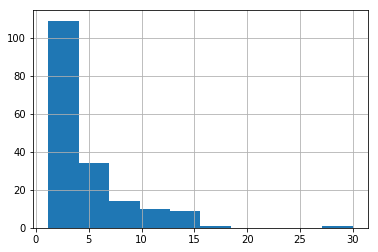

In [94]:
shower_gel.price_eur.hist()

In [95]:
print(shower_gel.brand.unique().shape[0])
shower_gel.describe()

40


,rating,price_eur
count,89.000000,178.000000
mean,96.887640,4.938567
std,10.688182,4.027161
min,20.000000,1.180000
25%,100.000000,2.480000
50%,100.000000,3.580000
75%,100.000000,5.650000
max,100.000000,29.980000


In shower gel category, there are 40 brand names, we should divide them into groups base on price range to under stand them better. 

C:\Users\Dieu Anh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


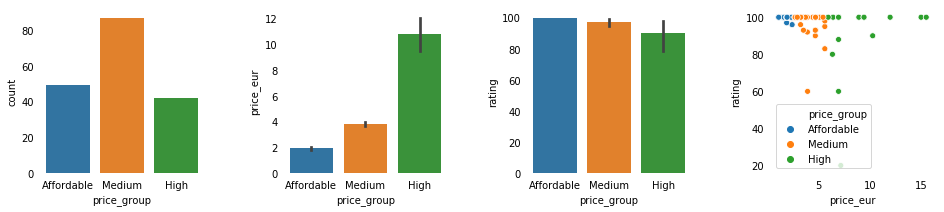

In [96]:
def mapping(price_eur):
    if price_eur <=2.5:
        return "Affordable"
    elif 2.5<price_eur<=5.65:
        return "Medium"
    else:
        return "High"
shower_gel['price_group']=shower_gel['price_eur'].apply(mapping)
price_groups=['Affordable', 'Medium', 'High']

f, ax = plt.subplots(figsize=(16, 3))
plt.subplots_adjust(wspace=0.5)
for sp in range(0,4):
    plt.subplot(1,4,sp+1)
    if sp==0:
        sns.countplot(x='price_group', data=shower_gel, order=price_groups)
    elif sp==1:
        sns.barplot(x='price_group', y='price_eur', data=shower_gel, order=price_groups)
    elif sp==2:
        sns.barplot(x='price_group', y='rating', data=shower_gel, order=price_groups)
    else:
        sns.scatterplot(x="price_eur", y="rating", hue="price_group",data=shower_gel, hue_order=price_groups)
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()

* Products are at the medium price ranging from 2.5 to 5.5 EUR/100ml.
* Most of rating are over 80% however, some products at medium and high price are rated pretty low. Let's see which are they.


In [97]:
shower_gel[shower_gel.rating<80]

,brand,product,base_price,category,rating,group,unit,price_eur,price_group
918,Grown Alchemist,"Hydra+Glyceryl-Oleate, Rosemary, Sandalwood","7,20 € / 100ml",Shower gel,20.0,Care,100ml,7.20,High
2056,Nesti Dante,Luxury Blackmit Aktivkohle,"3,98 € / 100ml",Shower gel,60.0,Care,100ml,3.98,Medium
2210,Greenland,Fruit EmotionsCoconut-Tangerine,"6,98 € / 100ml",Shower gel,60.0,Care,100ml,6.98,High


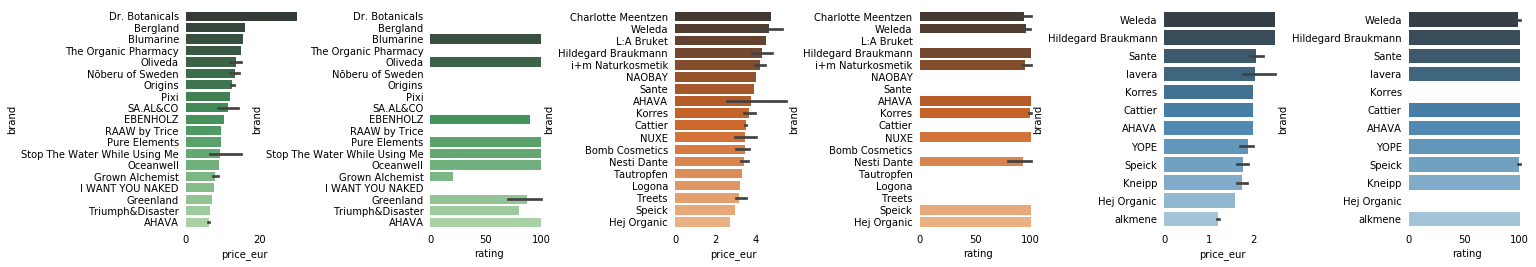

In [98]:
groups=['High', 'Medium', 'Affordable']
colors=['Greens_d', 'Oranges_d', 'Blues_d']

f, ax = plt.subplots(figsize=(24,4))
plt.subplots_adjust(wspace=1.1)

for sp in range(0,3):
    plt.subplot(1,6,(2*sp)+1)
    order_brands=(shower_gel[shower_gel.price_group==groups[sp]]
                  .groupby('brand')['price_eur']
                  .mean().sort_values(ascending=False).index)
    sns.barplot(x='price_eur', y='brand', data=shower_gel[shower_gel.price_group==groups[sp]],
                order=order_brands, palette=colors[sp])
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
    plt.subplot(1,6,(2*sp)+2)
    sns.barplot(x='rating', y='brand', data=shower_gel[shower_gel.price_group==groups[sp]],
                order=order_brands, palette=colors[sp])
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)

plt.show()

**3. Facial mask**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026F857D9C50>,
      dtype=object)

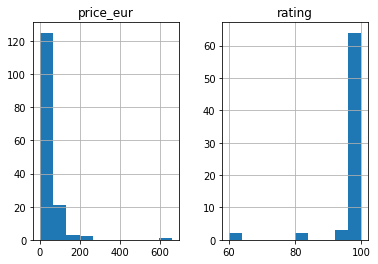

In [99]:
facial_mask=care[care.category=='Facial mask']
facial_mask.hist()

In [100]:
facial_mask[facial_mask.price_eur>400]

,brand,product,base_price,category,rating,group,unit,price_eur
2764,AHAVA,Diamond GlowMud,"659,90 € / 100ml",Facial mask,100.0,Care,100ml,659.9


A luxury product, sold at price 329,95 € for package of 50ml.

           rating   price_eur
count   70.000000  151.000000
mean    97.742857   40.311060
std      7.463313   36.209269
min     60.000000    1.550000
25%    100.000000   16.950000
50%    100.000000   29.270000
75%    100.000000   51.570000
max    100.000000  247.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026F861AF0F0>,
      dtype=object)

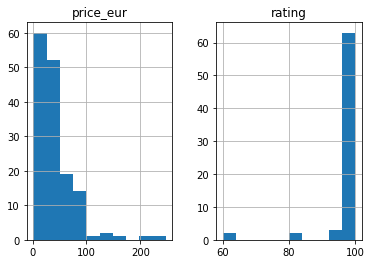

In [101]:
print(facial_mask[facial_mask.price_eur<400].describe())
facial_mask[facial_mask.price_eur<400].hist()

C:\Users\Dieu Anh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


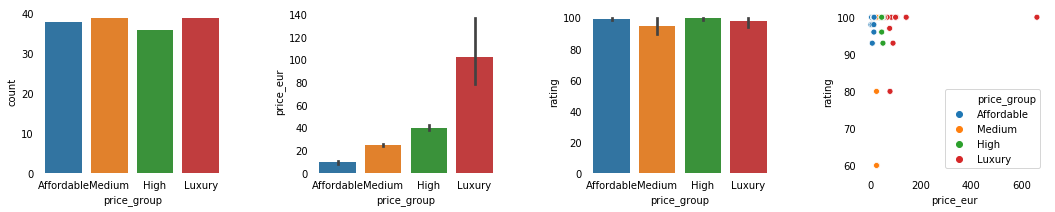

In [102]:
def mapping(price_eur):
    if price_eur <=16.95:
        return "Affordable"
    elif 16.95<price_eur<=29.27:
        return "Medium"
    elif 29.27<price_eur<=51.57:
        return "High"
    else:
        return 'Luxury'
facial_mask['price_group']=facial_mask['price_eur'].apply(mapping)

price_groups=['Affordable', 'Medium', 'High', 'Luxury']
f, ax = plt.subplots(figsize=(18, 3))
plt.subplots_adjust(wspace=0.5)
for sp in range(0,4):
    plt.subplot(1,4,sp+1)
    if sp==0:
        sns.countplot(x='price_group', data=facial_mask, order=price_groups)
    elif sp==1:
        sns.barplot(x='price_group', y='price_eur', data=facial_mask, order=price_groups)
    elif sp==2:
        sns.barplot(x='price_group', y='rating', data=facial_mask, order=price_groups)
    else:
        sns.scatterplot(x="price_eur", y="rating", hue="price_group",data=facial_mask, hue_order=price_groups)
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()

In [103]:
print(facial_mask.brand.unique().shape[0])
facial_mask[facial_mask.rating<80]

47


,brand,product,base_price,category,rating,group,unit,price_eur,price_group
1498,Hildegard Braukmann,ExquisitBio Effekt,"26,50 € / 100ml",Facial mask,60.0,Care,100ml,26.50,Medium
2348,Sante,Teekomplex & Parakresse,"24,38 € / 100ml",Facial mask,60.0,Care,100ml,24.38,Medium


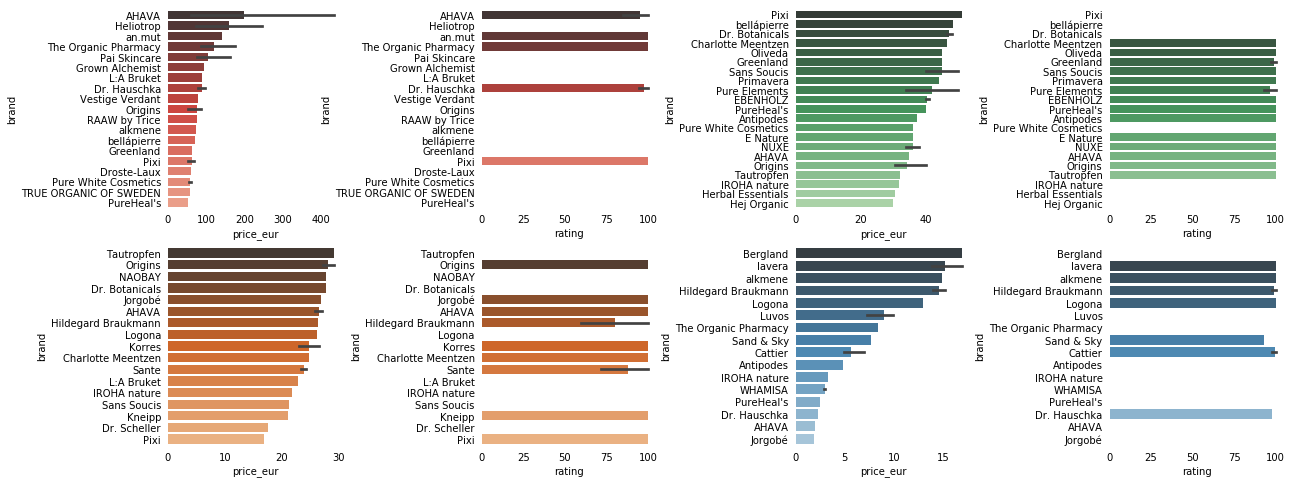

In [104]:
groups=['Luxury', 'High', 'Medium', 'Affordable']
colors=['Reds_d', 'Greens_d', 'Oranges_d', 'Blues_d']

f, ax = plt.subplots(figsize=(20,8))
plt.subplots_adjust(wspace=0.8)
for sp in range(0,4):
    plt.subplot(2,4,(2*sp)+1)
    order_brands=(facial_mask[facial_mask.price_group==groups[sp]]
                  .groupby('brand')['price_eur']
                  .mean().sort_values(ascending=False).index)
    sns.barplot(x='price_eur', y='brand', data=facial_mask[facial_mask.price_group==groups[sp]],
                order=order_brands, palette=colors[sp])
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
    plt.subplot(2,4,(2*sp)+2)
    sns.barplot(x='rating', y='brand', data=facial_mask[facial_mask.price_group==groups[sp]],
                order=order_brands, palette=colors[sp])
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()

* AHAVA is the brand has largest range of price. The review about them also achieve high rate, above 80%.
* Reviews are focused on the brands in High price group.
* Brand having largest range of rating is Hildegard Braukmann, which runs from 60% to 100%. Following is Sante.
* Brands try to cover many price segments.

**4. Face cream** 

We select product with base price is 100ml only.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026F877F4390>,
      dtype=object)

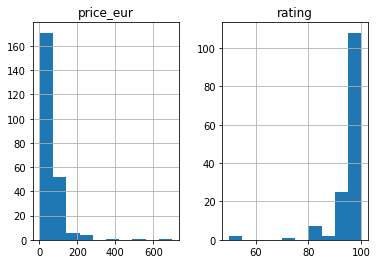

In [105]:
face_cream=care[(care.category=='Face cream') & (care.unit=='100ml')]
face_cream.hist()

Let's see product with outliner prices.

In [106]:
face_cream[face_cream.price_eur>300]

,brand,product,base_price,category,rating,group,unit,price_eur
178,The Organic Pharmacy,Rose Diamond,"699,90 € / 100ml",Face cream,NaN,Care,100ml,699.90
3010,bellápierre,Precious SkincareDiamonds,"529,83 € / 100ml",Face cream,NaN,Care,100ml,529.83
3250,The Organic Pharmacy,Rose PlusAge Renewal,"399,90 € / 100ml",Face cream,NaN,Care,100ml,399.90


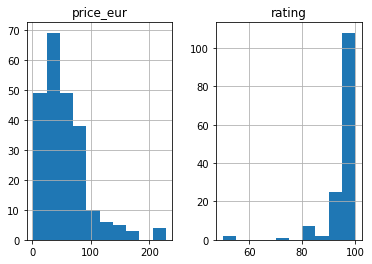

,rating,price_eur
count,145.00000,233.000000
mean,96.17931,56.101803
std,7.69981,40.441278
min,50.00000,2.400000
25%,94.00000,26.500000
50%,100.00000,46.500000
75%,100.00000,75.000000
max,100.00000,227.900000


In [107]:
face_cream[face_cream.price_eur<300].hist()
plt.show()
face_cream[face_cream.price_eur<300].describe()

Based on 3 quartiles of price, we divide face creams into 4 groups.

C:\Users\Dieu Anh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


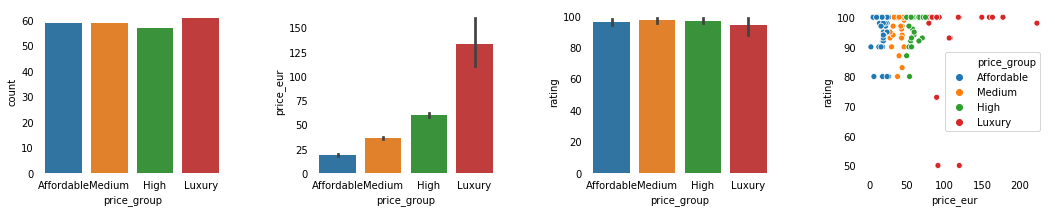

In [129]:
def mapping(price_eur):
    if price_eur <=26.5:
        return "Affordable"
    elif 26.5<price_eur<=46.5:
        return "Medium"
    elif 46.5<price_eur<=75:
        return "High"
    else:
        return 'Luxury'
face_cream['price_group']=face_cream['price_eur'].apply(mapping)

price_groups=['Affordable', 'Medium', 'High', 'Luxury']
f, ax = plt.subplots(figsize=(18, 3))
plt.subplots_adjust(wspace=0.5)
for sp in range(0,4):
    plt.subplot(1,4,sp+1)
    if sp==0:
        sns.countplot(x='price_group', data=face_cream, order=price_groups)
    elif sp==1:
        sns.barplot(x='price_group', y='price_eur', data=face_cream, order=price_groups)
    elif sp==2:
        sns.barplot(x='price_group', y='rating', data=face_cream, order=price_groups)
    else:
        sns.scatterplot(x="price_eur", y="rating", hue="price_group",data=face_cream, hue_order=price_groups)
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.savefig('face_cream_price_group.png')
plt.show()

* The number of product in each group are quite similar.
* Rating of face cream are quite high, above 80%, bad reviews are in the Luxury price group. Let's see which are they.

In [109]:
face_cream[face_cream.rating<80]

,brand,product,base_price,category,rating,group,unit,price_eur,price_group
663,Primavera,Rose GranatapfelRevitalcreme,"89,83 € / 100ml",Face cream,73.0,Care,100ml,89.83,Luxury
797,Grown Alchemist,Matte Balancing MoisturiserAcaï-Berry & Borago,"91,58 € / 100ml",Face cream,50.0,Care,100ml,91.58,Luxury
3257,The Organic Pharmacy,Manuka,"119,90 € / 100ml",Face cream,50.0,Care,100ml,119.90,Luxury


There are 54 unique brands of face creams, let's see their average price and rating.

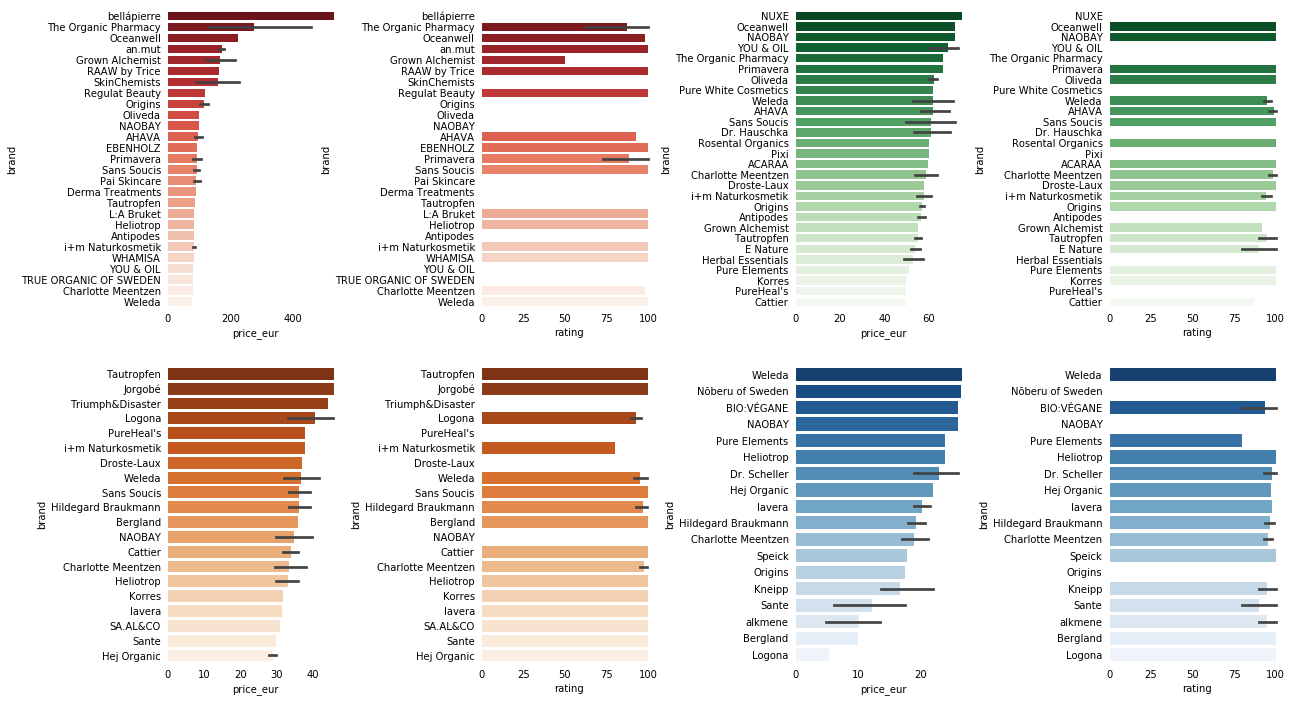

In [110]:
groups=['Luxury', 'High', 'Medium', 'Affordable']
colors=['Reds_r', 'Greens_r', 'Oranges_r', 'Blues_r']

f, ax = plt.subplots(figsize=(20,12))
plt.subplots_adjust(wspace=0.8)
for sp in range(0,4):
    plt.subplot(2,4,(2*sp)+1)
    order_brands=(face_cream[face_cream.price_group==groups[sp]]
                  .groupby('brand')['price_eur']
                  .mean().sort_values(ascending=False).index)
    sns.barplot(x='price_eur', y='brand', data=face_cream[face_cream.price_group==groups[sp]],
                order=order_brands, palette=colors[sp])
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
    plt.subplot(2,4,(2*sp)+2)
    sns.barplot(x='rating', y='brand', data=face_cream[face_cream.price_group==groups[sp]],
                order=order_brands, palette=colors[sp])
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()

* The most expensive brand is 'bellapierre'. They haven't received any review yet.
* Following is 'The Organic Pharmacy', this brands has the largest price and rating range.
* Although Grown Alchemist is in the Luxury price group but they has the lowest average rating, only 60%.
* Some brands have various products at different price, for instance Kneipp, Sante, alkmene, NAOBAY, Weleda, Dr. Hauschka, Sans Soucis, SkinChemists.

**5. Face serum**

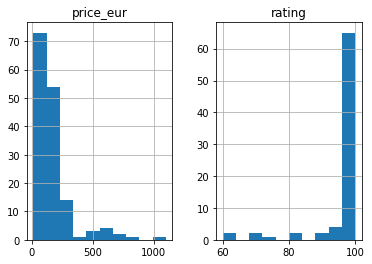

,brand,product,base_price,category,rating,group,unit,price_eur
count,153,153,153,153,78.000000,153,153,153.000000
unique,51,153,102,1,NaN,1,1,NaN
top,Origins,GesichtspflegeRosa Heilerde - Defensil-Plus,"43,17 € / 100ml",Facial serum,NaN,Care,100ml,NaN
freq,9,1,8,153,NaN,153,153,NaN
mean,NaN,NaN,NaN,NaN,96.628205,NaN,NaN,171.151373
std,NaN,NaN,NaN,NaN,8.843677,NaN,NaN,165.311444
min,NaN,NaN,NaN,NaN,60.000000,NaN,NaN,13.900000
25%,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,76.070000
50%,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,123.330000
75%,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,193.170000


In [111]:
face_serum=care[(care.category=='Facial serum') & (care.unit=='100ml')]
face_serum.hist()
plt.show()
face_serum.describe(include='all')

In [112]:
face_serum[face_serum.price_eur>1000]

,brand,product,base_price,category,rating,group,unit,price_eur
2802,AHAVA,Diamond Glow,"1099,83 € / 100ml",Facial serum,NaN,Care,100ml,1099.83


This product is sold with package of 30 ml at 329,95 €.

           rating   price_eur
count   78.000000  152.000000
mean    96.628205  165.041645
std      8.843677  147.511787
min     60.000000   13.900000
25%    100.000000   75.942500
50%    100.000000  123.250000
75%    100.000000  188.167500
max    100.000000  829.830000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026F87B48C88>,
      dtype=object)

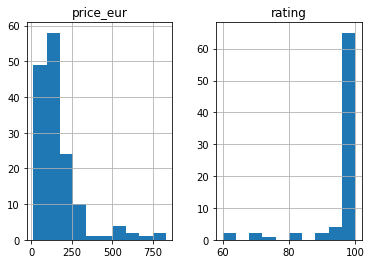

In [113]:
print(face_serum[face_serum.price_eur<1000].describe())
face_serum[face_serum.price_eur<1000].hist()

Based on 3 quartile we divide products into 4 price groups:

C:\Users\Dieu Anh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


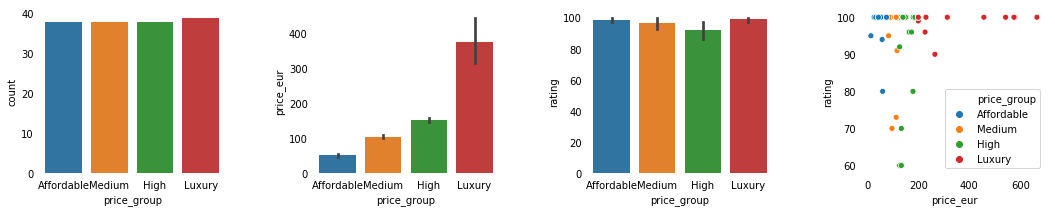

In [114]:
def mapping(price_eur):
    if price_eur <=75.9425:
        return "Affordable"
    elif 75.9425<price_eur<=123.25:
        return "Medium"
    elif 123.25<price_eur<=188.1675:
        return "High"
    else:
        return 'Luxury'
face_serum['price_group']=face_serum['price_eur'].apply(mapping)
price_groups=['Affordable', 'Medium', 'High', 'Luxury']

f, ax = plt.subplots(figsize=(18, 3))
plt.subplots_adjust(wspace=0.5)
for sp in range(0,4):
    plt.subplot(1,4,sp+1)
    if sp==0:
        sns.countplot(x='price_group', data=face_serum, order=price_groups)
    elif sp==1:
        sns.barplot(x='price_group', y='price_eur', data=face_serum, order=price_groups)
    elif sp==2:
        sns.barplot(x='price_group', y='rating', data=face_serum, order=price_groups)
    else:
        sns.scatterplot(x="price_eur", y="rating", hue="price_group",data=face_serum, hue_order=price_groups)
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()

* The average price of Luxury group is twice as average price of High group
* Bad ratings are in Medium and High price groups while ratings for Affordable and Luxury groups are from 80% and above.


In [115]:
face_serum[face_serum.rating<80].sort_values(by='price_eur')

,brand,product,base_price,category,rating,group,unit,price_eur,price_group
582,Korres,Wild Rose,"96,50 € / 100ml",Facial serum,70.0,Care,100ml,96.50,Medium
3218,Pixi,SkintreatsHydrating Milky,"113,17 € / 100ml",Facial serum,73.0,Care,100ml,113.17,Medium
2923,Pure White Cosmetics,OvernightAntioxidant Renewal Serum,"126,67 € / 100ml",Facial serum,60.0,Care,100ml,126.67,High
2961,Organic & Botanic,Madagascan CoconutEnergising,"133,17 € / 100ml",Facial serum,70.0,Care,100ml,133.17,High
2971,Organic & Botanic,Mandarin OrangeCorrecting,"133,17 € / 100ml",Facial serum,60.0,Care,100ml,133.17,High


Average price and rating for each brands.

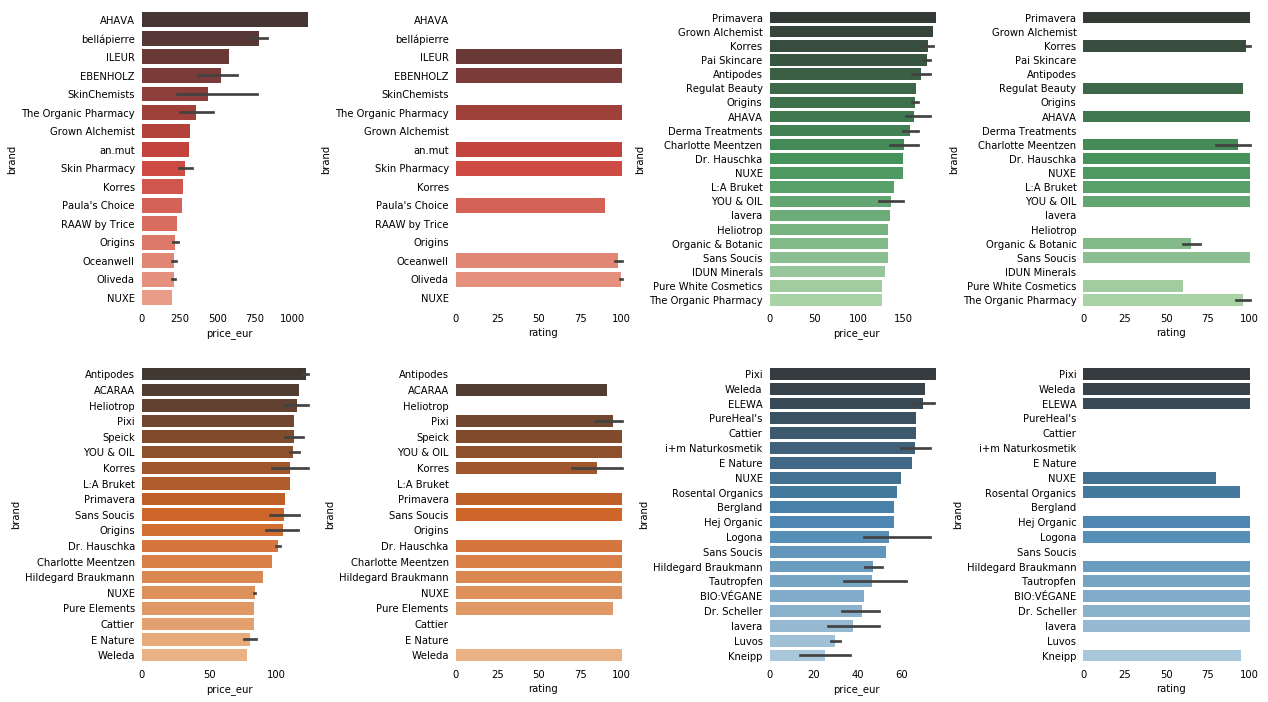

In [116]:
groups=['Luxury', 'High', 'Medium', 'Affordable']
colors=['Reds_d', 'Greens_d', 'Oranges_d', 'Blues_d']

f, ax = plt.subplots(figsize=(20,12))
plt.subplots_adjust(wspace=0.8)
for sp in range(0,4):
    plt.subplot(2,4,(2*sp)+1)
    order_brands=(face_serum[face_serum.price_group==groups[sp]]
                  .groupby('brand')['price_eur']
                  .mean().sort_values(ascending=False).index)
    sns.barplot(x='price_eur', y='brand', data=face_serum[face_serum.price_group==groups[sp]],
                order=order_brands, palette=colors[sp])
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
    plt.subplot(2,4,(2*sp)+2)
    sns.barplot(x='rating', y='brand', data=face_serum[face_serum.price_group==groups[sp]],
                order=order_brands, palette=colors[sp])
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()

* With more than 50 brands, face cream is the most diverse category about brands.
* The most expensive brand is AHAVA and the most effordable brand is Kneipp.
* The rating concentrate on the Mediuma and High price groups.
* NUXE products appear in all price segment. Other brands also keep appearing in several price segments, for example Pixi, Dr. Hauschka, Cattier, Origins. etc.
* Although Pure White Cosmetics and Organic & Botanic are in High price group but their rating are the worst.
